<a href="https://colab.research.google.com/github/huskeypm/herg/blob/main/herg_XF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Porpoise:**This notebooks allows an end-user to reproduce key figures in our hERG manuscript, based on 'feature' sets that have been procured from simulation and sequence analyses. Several statistical and machine learning processes are defined below. 

**Usage:** Hit shift-enter a buncho times to conduct the analyses and generate the corresponding figures.

Many of the analyses use routines that are imported from the herg git project that is cloned below. 

*Contact pkekeneshuskey@luc.edu for support*


Summary of data figures in paper
- Figs 2 and 3 are generated from gnu plot files included with git repo. Comparable data is displayed in [Section 1](#section_1)
- Version of Fig 5 is computed in [Section 1](#section_1)
- Table 1 can be reassembled from code outputs in [Section 2](#section_2)
- Figs 6-9 is based on outputs from [Section 2](#section_2)


Clone python libraries in support of this notebook 

In [ ]:
!git clone https://github.com/huskeypm/herg.git

Cloning into 'herg'...
remote: Enumerating objects: 271, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 271 (delta 17), reused 27 (delta 12), pack-reused 237
Receiving objects: 100% (271/271), 1.38 MiB | 9.39 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [ ]:
!pip3 install pydotplus
!pip3 install mlxtend


In [ ]:
cd /content/herg


/content/herg


In [ ]:
!git pull 

remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 9), reused 10 (delta 4), pack-reused 0
Unpacking objects: 100% (15/15), done.
From https://github.com/huskeypm/herg
   71d7d92..7d6d704  main       -> origin/main
Updating 71d7d92..7d6d704
Fast-forward
 .DS_Store                                        |  Bin 8196 -> 10244 bytes
 dt_all_features.ipynb                            | 1705 ++++++++++++++
 feature_sets/.DS_Store                           |  Bin 8196 -> 8196 bytes
 feature_sets/cole_dataset.txt                    |   26 +
 rf_allfeatures_trainntest_cole_predictions.ipynb | 2598 ++++++++++++++++++++++
 5 files changed, 4329 insertions(+)
 create mode 100644 dt_all_features.ipynb
 create mode 100644 feature_sets/cole_dataset.txt
 create mode 100644 rf_allfeatures_trainntest_cole_predictions.ipynb


In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib.pylab as plt
import pandas as pd
import probUtil as dU
import mlUtil
import feature
import numpy as np

Load feature set for PAS domain variants. Features are explained in readme [TODO] . Most features are computed offline and stored in a txt file that is included with the git repo

In [ ]:
dataFile = "feature_sets/features-latest-sets1n2.txt"
df = pd.read_csv(dataFile, sep="\s+", comment='#')



Add additional features. The imported library can be edited to conduct additional analyses

In [ ]:
tags=["WATERS", "HBONDS", "RMSD", "SASA", "HELIX", "TURNS", "COILS", "THREE-TEN", "BETA"]

feature.CalcInitialAA(df,newTag="INITAA")
feature.Calccharge(df,newTag="CHARGE")
rmsf={
    'RMSF36TO41' : 'rmsf_sub2.txt',
    'RMSF87TO92' : 'rmsf_sub3.txt',
    'RMSF73TO78' : 'rmsf_sub4.txt',
    'RMSF115TO120' : 'rmsf_sub.txt'} 
for key,val in rmsf.items():
      print("feature_sets/%s"%val,key)
      #feature.CalcRMSFLoc(df,"feature_sets/rmsf_sub2.txt", newTag="RMSF36TO41")
      feature.CalcRMSFLoc(df,"feature_sets/%s"%val, newTag=key)
      tags+=[key]


feature_sets/rmsf_sub2.txt RMSF36TO41
a80p  not found in input list
c64w-q61g  not found in input list
d102a  not found in input list
i96v  not found in input list
feature_sets/rmsf_sub3.txt RMSF87TO92
a80p  not found in input list
c64w-q61g  not found in input list
d102a  not found in input list
i96v  not found in input list
feature_sets/rmsf_sub4.txt RMSF73TO78
a80p  not found in input list
c64w-q61g  not found in input list
d102a  not found in input list
i96v  not found in input list
feature_sets/rmsf_sub.txt RMSF115TO120
a80p  not found in input list
c64w-q61g  not found in input list
d102a  not found in input list
i96v  not found in input list


Print all fields in data set to decide which features to use

In [ ]:
# get list of features
for col in df.columns:
    print(col)


VARIANT
HELIX
TURNS
COILS
THREE-TEN
BETA
ISOLATED
RMSD
HBONDS
SASA
WATERS
FOLDX
CONSERVATION
HYDROPHOBICITY
CLASS
TRAFFICKING
INITAA
RMSF36TO41
RMSF87TO92
RMSF73TO78
RMSF115TO120


Display the first few variants and their corresponding features

In [ ]:
df


,VARIANT,HELIX,TURNS,COILS,THREE-TEN,BETA,ISOLATED,RMSD,HBONDS,SASA,WATERS,FOLDX,CONSERVATION,HYDROPHOBICITY,CLASS,TRAFFICKING,INITAA,RMSF36TO41,RMSF87TO92,RMSF73TO78,RMSF115TO120
0,a32t,21.1567,21.2058,14.4202,3.29401,39.6439,0.279349,1.23560,66.7186,6473.83,1479.93,3.763310,-0.549,-0.43,1,1,0,1.36,0.80,0.79,1.94
1,a57p,20.4290,21.8332,14.5935,3.53135,39.4690,0.144014,1.28151,66.0936,6477.76,1526.79,-0.764827,-0.312,-0.32,0,1,0,1.16,0.75,0.86,1.56
2,a78p,20.8206,21.3096,14.5379,3.19232,39.9190,0.220522,1.12505,65.8526,6479.56,1474.41,0.759351,1.487,-0.32,1,1,0,1.23,0.82,0.85,1.67
3,a85v,20.8686,21.4237,14.6775,3.12031,39.6774,0.232523,1.16450,65.4562,6544.62,1492.34,2.430410,-0.518,0.29,1,1,0,1.31,0.87,0.88,1.52
4,c108r,22.1452,21.1476,15.3975,2.75727,38.2283,0.324033,1.58552,62.7131,6753.12,1548.93,6.958320,0.745,-1.84,1,0,1,1.30,0.91,1.14,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,v94g,21.3471,21.1671,14.3579,2.88329,39.9415,0.303030,1.15005,67.0823,6481.89,1478.32,4.519590,0.858,-0.38,1,0,17,1.27,0.93,1.00,1.63
71,wt,19.4789,21.9577,14.7117,3.29257,40.5025,0.056664,1.09132,66.7740,6568.87,1445.16,0.000000,0.000,0.00,0,1,20,1.12,1.35,0.83,1.51
72,y43c,21.0411,21.3291,14.3204,2.88329,40.1875,0.238524,1.14731,65.0498,6467.45,1473.23,0.734260,-0.802,0.02,1,0,19,1.48,0.91,0.88,1.59
73,y54h,21.4147,21.2601,14.9385,2.89979,39.3144,0.172517,1.33484,65.8552,6512.28,1455.57,1.532110,0.344,-0.42,1,1,19,1.52,0.87,0.86,1.88


Select tags/features you want for use for classification. Output corresponds to the classes for each variant (1 - trafficks, 0 - does not traffic)

In [ ]:
#tags=["WATERS", "HBONDS", "RMSD", "SASA", "HELIX", "TURNS", "BETA", "COILS", "THREE-TEN",# derived from MD 
tags+=["CONSERVATION","FOLDX", "HYDROPHOBICITY"] # derived from sequence
output = ["TRAFFICKING"]


### Section 1: Build and Apply probabilistic classifier 

<a id=’section_1’></a>
[UNDER CONSTRUCTION]
Defines a conditional probability (see methods in the hERG paper) for each feature that represents the likelihood a variant is nontrafficking if its feature value is above some value. 

Displays 
- distribution of variants according to a given feature (converted to z-scores). Green are trafficking; red are non-trafficking. 
- All conditional probs are shown in one graph (Cond. probability)
- ROC curve gives the true and false positive rates for identifying a non-trafficking variant. 
- Also shown is a plot for the true/false positive/negative rates, but this is currently INCORRECT

Prints out
- indi_condprob_md.pdf; 
- roc_conditional_probability 
in the local file directory.

In [ ]:
cases = dict() # for storing all outputs 

/content/herg/probUtil.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/content/herg/probUtil.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/content/herg/probUtil.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/content/herg/probUtil.py:68: RuntimeWarning: More than 20

TESTING  stats


/content/herg/probUtil.py:234: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Accuracy(NT) 0.6
Precision(NT) 0.0
Recall(NT) 0.0
F1 score(NT) 0.0
Accuracy(T) 0.6
Precision(T) 0.6
Recall(T) 1.0
F1 score(T) 0.7499999999999999


/content/herg/probUtil.py:234: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/content/herg/probUtil.py:387: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/content/herg/probUtil.py:399: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


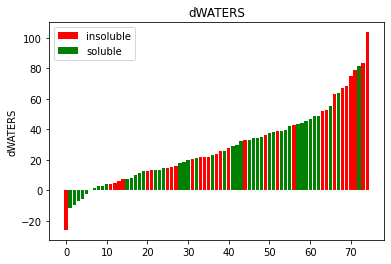

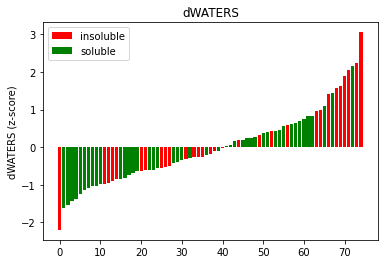

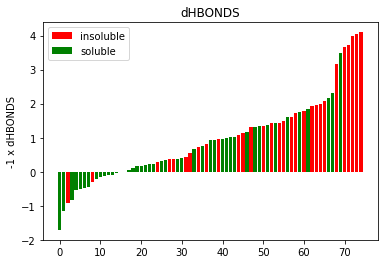

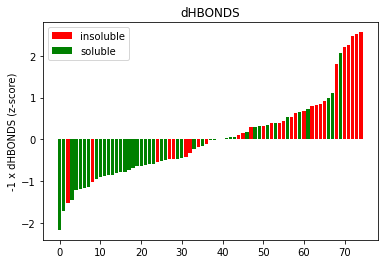

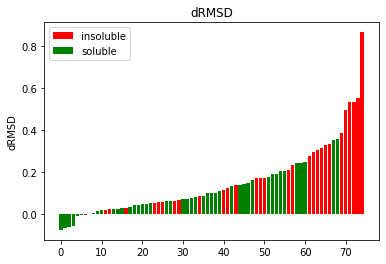

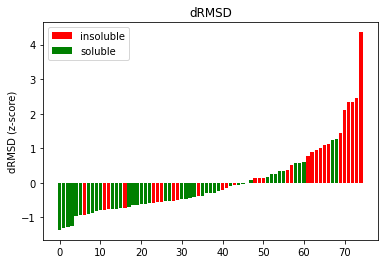

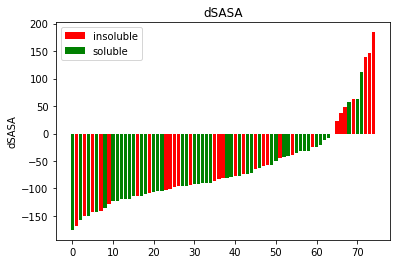

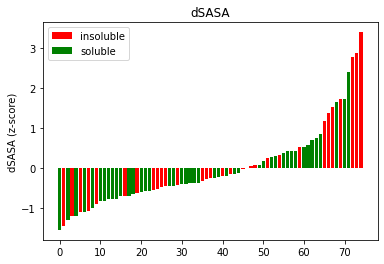

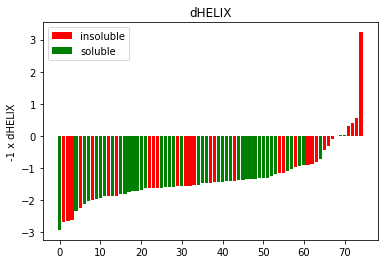

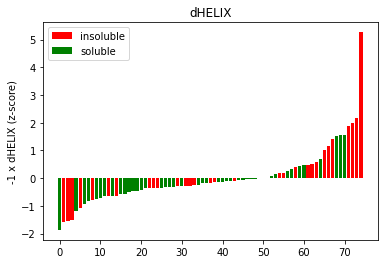

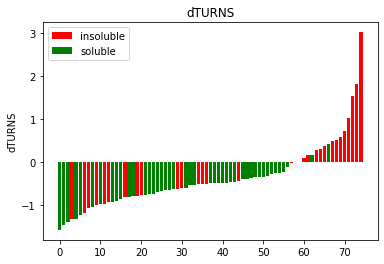

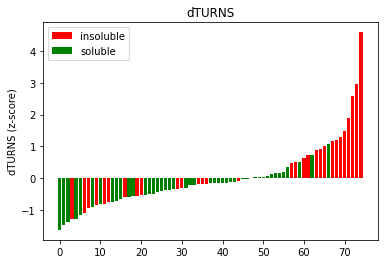

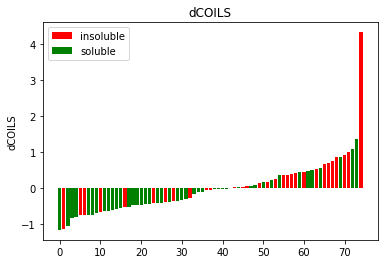

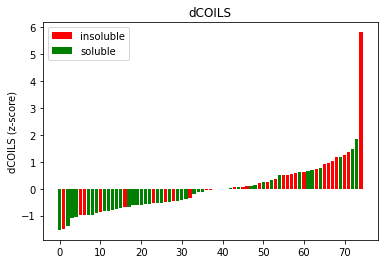

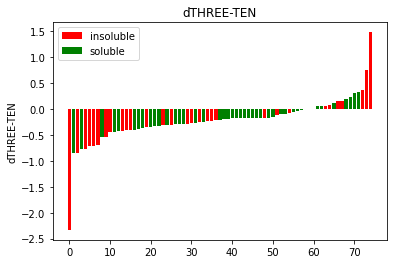

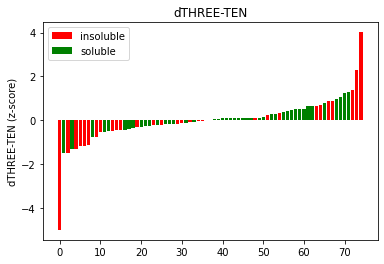

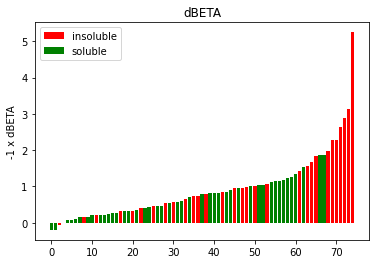

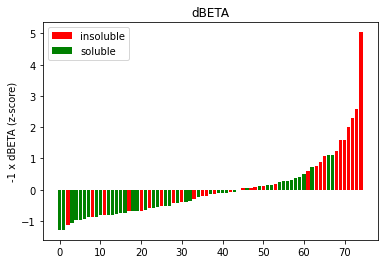

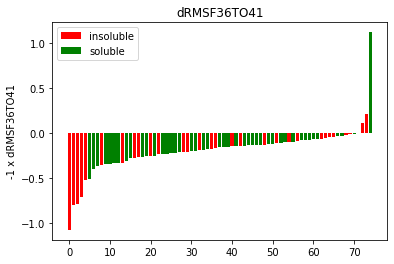

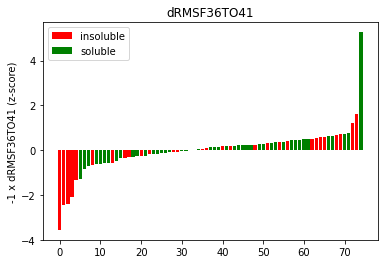

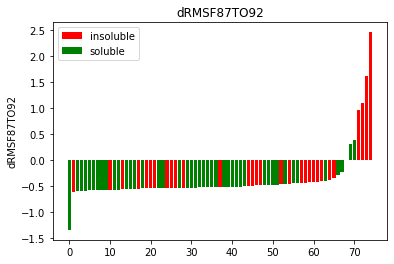

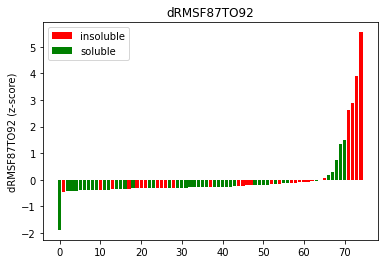

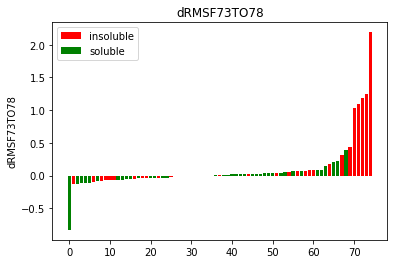

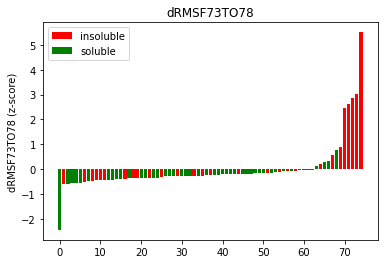

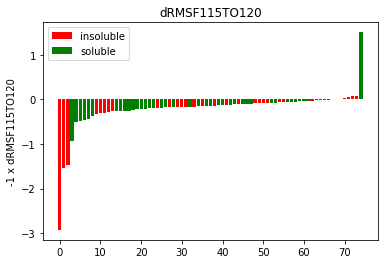

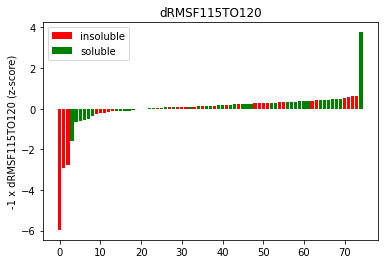

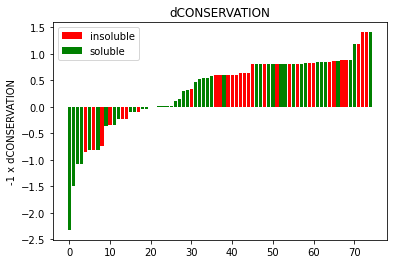

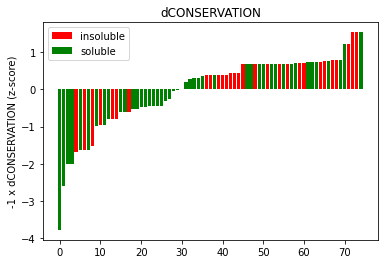

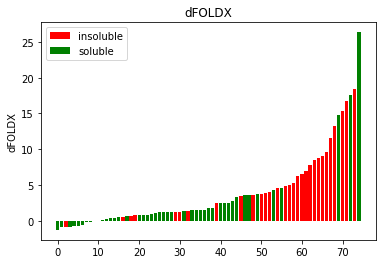

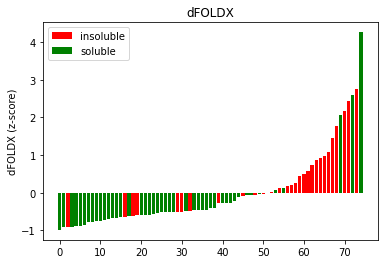

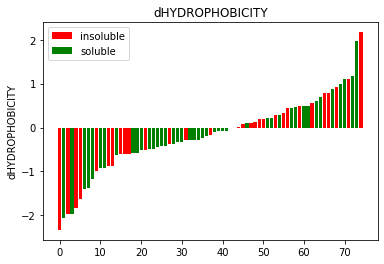

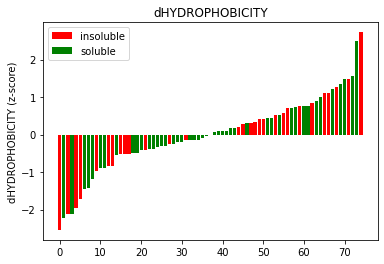

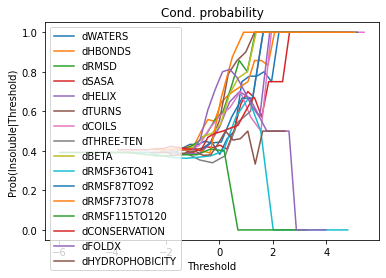

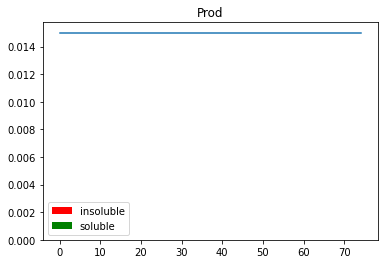

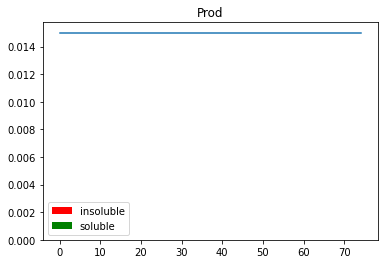

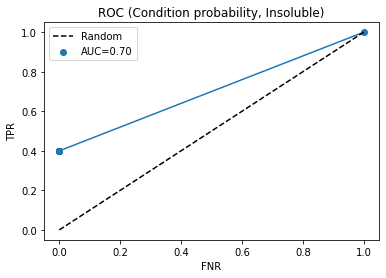

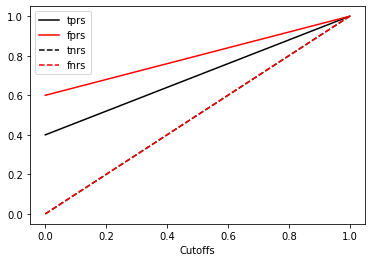

In [ ]:
display=True  
outputs = dU.ProbClassifier(df,tags,display=display,split=False)
cases['Prob'] = outputs

In [ ]:
if 0: 
  from google.colab import drive
  drive.mount('/content/drive')

### Section 2: Build and Apply machine-learning classifiers 
<a id=’section_2’></a>

Outputs
- Metrics for classification performance (precision, recall etc). Terms are defined in Methods of hERG paper
- Cross-validation matrix
- ROC curve
- Most important features used in classifier


In [ ]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve

from mlxtend.data import iris_data
from sklearn.utils import resample

import os
import math
from math import floor, ceil

# stuff for plotting trees
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

def plotDT(dtree,featureNames = None,classNames=None):
    dot_data = StringIO()
    export_graphviz(dtree, 
                    out_file=dot_data,  
                    feature_names = featureNames,
                    class_names =  classNames,
                    filled=True, 
                    rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    l=Image(graph.create_png())
    return l

def TestAccuracy(clf,X_test,y_test, display=False):
    
    y_pred  = clf.predict( X_test.values)  
    results = ( y_test.values[:,0]==y_pred )

    if display:
        nEntries, dummy = X_test.shape
        for i in range(nEntries):
            print(X_test.iloc[i])
            print("Class=%s Prediction %s %s\n"%(y_test.values[i,0],y_pred[i],results[i]) )
        #print("prediction",results)

    # accuracy
    nTrue = np.sum( results )
    nTot = np.float( np.shape( results)[0] )
    accuracy = nTrue/nTot
    print("Overall accuracy ",accuracy)

def TestAccuracySingle(clf,X_test,Y_test,idx=0):
    
    print(X_test.iloc[idx])
    result = clf.predict( [X_test.values[idx,:]])
    print("prediction",result)
    #print(Y_test.iloc[idx])

#### Decision tree


Example with PAS data

In [ ]:
dataFile = "feature_sets/features-latest-sets1n2.txt"

df = pd.read_csv(dataFile, sep="\s+", comment='#')

df.head()

,VARIANT,HELIX,TURNS,COILS,THREE-TEN,BETA,ISOLATED,RMSD,HBONDS,SASA,WATERS,FOLDX,CONSERVATION,HYDROPHOBICITY,CLASS,TRAFFICKING
0,a32t,21.1567,21.2058,14.4202,3.29401,39.6439,0.279349,1.23560,66.7186,6473.83,1479.93,3.763310,-0.549,-0.43,1,1
1,a57p,20.4290,21.8332,14.5935,3.53135,39.4690,0.144014,1.28151,66.0936,6477.76,1526.79,-0.764827,-0.312,-0.32,0,1
2,a78p,20.8206,21.3096,14.5379,3.19232,39.9190,0.220522,1.12505,65.8526,6479.56,1474.41,0.759351,1.487,-0.32,1,1
3,a85v,20.8686,21.4237,14.6775,3.12031,39.6774,0.232523,1.16450,65.4562,6544.62,1492.34,2.430410,-0.518,0.29,1,1
4,c108r,22.1452,21.1476,15.3975,2.75727,38.2283,0.324033,1.58552,62.7131,6753.12,1548.93,6.958320,0.745,-1.84,1,0


In [ ]:
#df['decimal_place_2'] = df['decimal_place_2'].round(2)
df['HELIX'] = df['HELIX'].round(2)
df['TURNS'] = df['TURNS'].round(2)
df['COILS'] = df['COILS'].round(2)
df['THREE-TEN'] = df['THREE-TEN'].round(2)
df['BETA'] = df['BETA'].round(2)
df['RMSD'] = df['RMSD'].round(2)
df['HBONDS'] = df['HBONDS'].round()
df['SASA'] = df['SASA'].round()
df['WATERS'] = df['WATERS'].round()
df['FOLDX'] = df['FOLDX'].round(2)
df['CONSERVATION'] = df['CONSERVATION'].round(2)
df['HYDROPHOBICITY'] = df['HYDROPHOBICITY'].round(2)

df.head()


,VARIANT,HELIX,TURNS,COILS,THREE-TEN,BETA,ISOLATED,RMSD,HBONDS,SASA,WATERS,FOLDX,CONSERVATION,HYDROPHOBICITY,CLASS,TRAFFICKING
0,a32t,21.16,21.21,14.42,3.29,39.64,0.279349,1.24,67.0,6474.0,1480.0,3.76,-0.55,-0.43,1,1
1,a57p,20.43,21.83,14.59,3.53,39.47,0.144014,1.28,66.0,6478.0,1527.0,-0.76,-0.31,-0.32,0,1
2,a78p,20.82,21.31,14.54,3.19,39.92,0.220522,1.13,66.0,6480.0,1474.0,0.76,1.49,-0.32,1,1
3,a85v,20.87,21.42,14.68,3.12,39.68,0.232523,1.16,65.0,6545.0,1492.0,2.43,-0.52,0.29,1,1
4,c108r,22.15,21.15,15.40,2.76,38.23,0.324033,1.59,63.0,6753.0,1549.0,6.96,0.74,-1.84,1,0


In [ ]:
# done on Kal's local machine and the end result "rmsf_sub.txt" is under /feature_sets

#read a rmsf file to a pandas data frame
rmsfile = "/Users/drkal/Desktop/professional/peter-lab/herg-project/machine-learning/herg-features/rmsf/rmsf-matrix.txt"
dfrmsf = pd.read_csv(rmsfile, sep="\s+", comment='#')
dfrmsf.head()

#extract a subset of rows from rmsf file
dfrmsf_sub = dfrmsf.loc[89:94,] # actual residues in the sequence 115 to 120 
dfrmsf_sub2 = dfrmsf.loc[10:15,]# actual residues in the sequence 36 to 41
dfrmsf_sub3 = dfrmsf.loc[61:66,]# actual residues in the sequence 87 to 92
dfrmsf_sub4 = dfrmsf.loc[47:52,]# actual residues in the sequence 73 to 78

#calculate the mean of the rows 89 to 94 for each variant
dfrmsf_sub_mean = dfrmsf_sub.mean().round(2)
dfrmsf_sub2_mean = dfrmsf_sub2.mean().round(2)
dfrmsf_sub3_mean = dfrmsf_sub3.mean().round(2)
dfrmsf_sub4_mean = dfrmsf_sub4.mean().round(2)

#dfrmsf_sub_mean

dfrmsf_sub_mean.shape

#save the mean of rows 89 to 94 to a file
dfrmsf_sub_mean.to_csv('/Users/drkal/Desktop/professional/peter-lab/herg-project/machine-learning/herg-features/rmsf/rmsf_sub.txt', sep='\t', header=["RMSF115TO120"])
dfrmsf_sub2_mean.to_csv('/Users/drkal/Desktop/professional/peter-lab/herg-project/machine-learning/herg-features/rmsf/rmsf_sub2.txt', sep='\t', header=["RMSF36TO41"])
dfrmsf_sub3_mean.to_csv('/Users/drkal/Desktop/professional/peter-lab/herg-project/machine-learning/herg-features/rmsf/rmsf_sub3.txt', sep='\t', header=["RMSF87TO92"])
dfrmsf_sub4_mean.to_csv('/Users/drkal/Desktop/professional/peter-lab/herg-project/machine-learning/herg-features/rmsf/rmsf_sub4.txt', sep='\t', header=["RMSF73TO78"])

dfrmsf_sub_mean.columns=['RMSF115TO120']

In [ ]:
df2 = pd.read_csv('feature_sets/rmsf_sub.txt', sep='\t')

In [ ]:
features=["HELIX","TURNS","COILS","THREE-TEN","BETA","RMSD","HBONDS","SASA","WATERS","FOLDX","CONSERVATION","HYDROPHOBICITY"]
#features1=["HBONDS","WATERS","FOLDX", "TURNS","CONSERVATION"]

output = ["TRAFFICKING"]

In [ ]:
#X = df[features1]
X = df[features]
Y = df[output]
#X.head()
#Y.head()

X_train, X_test, Y_train, Y_test =\
  train_test_split( X, Y, train_size=0.7, test_size=0.3, random_state=50)

Data looks very unbalanced

In [ ]:
### upsample the minority class, which is benign (class = 0)

In [ ]:
# concatenate our traning data back together
#C = pd.concat([X_train, Y_train], axis=1)

In [ ]:
# seperate minority and majority classes
#group = C.groupby('CLASS')
#benign=list(group)[0][1]
#pathogenic=list(group)[1][1]

In [ ]:
#upsample minority
#benign_upsampled = resample(benign,
#                            replace=True, #sample with replacement
#                            n_samples=len(pathogenic), #match number in majority class
#                            random_state=100 #reproduce results
#                           )

In [ ]:
#combine majority and upsampled minority
#upsampled = pd.concat([pathogenic, benign_upsampled])

Using class_weight="balanced" to reweight classes based on class frequency

In [ ]:
#initializing the classifier and fitting it
clf_entropy = DecisionTreeClassifier(
  criterion = "entropy",
  #class_weight="balanced",
  random_state=50, #set random number seed  
  max_depth=None,
    max_features=4,
    min_samples_leaf=1) #min of samples needed at a node for it to split further

In [ ]:
# train the classifier with resampled data
#X_train=pd.DataFrame(upsampled, columns=["RMSD", "HBONDS", "WATERS"])
#X_train=pd.DataFrame(upsampled, columns=["RMSD"])
#Y_train=pd.DataFrame(upsampled, columns=["CLASS"])

model=clf_entropy.fit(X_train, Y_train)

In [ ]:
# print training accuracy
print("Training sample accuracy")
TestAccuracy(clf_entropy,X_train,Y_train)

Training sample accuracy
Overall accuracy  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


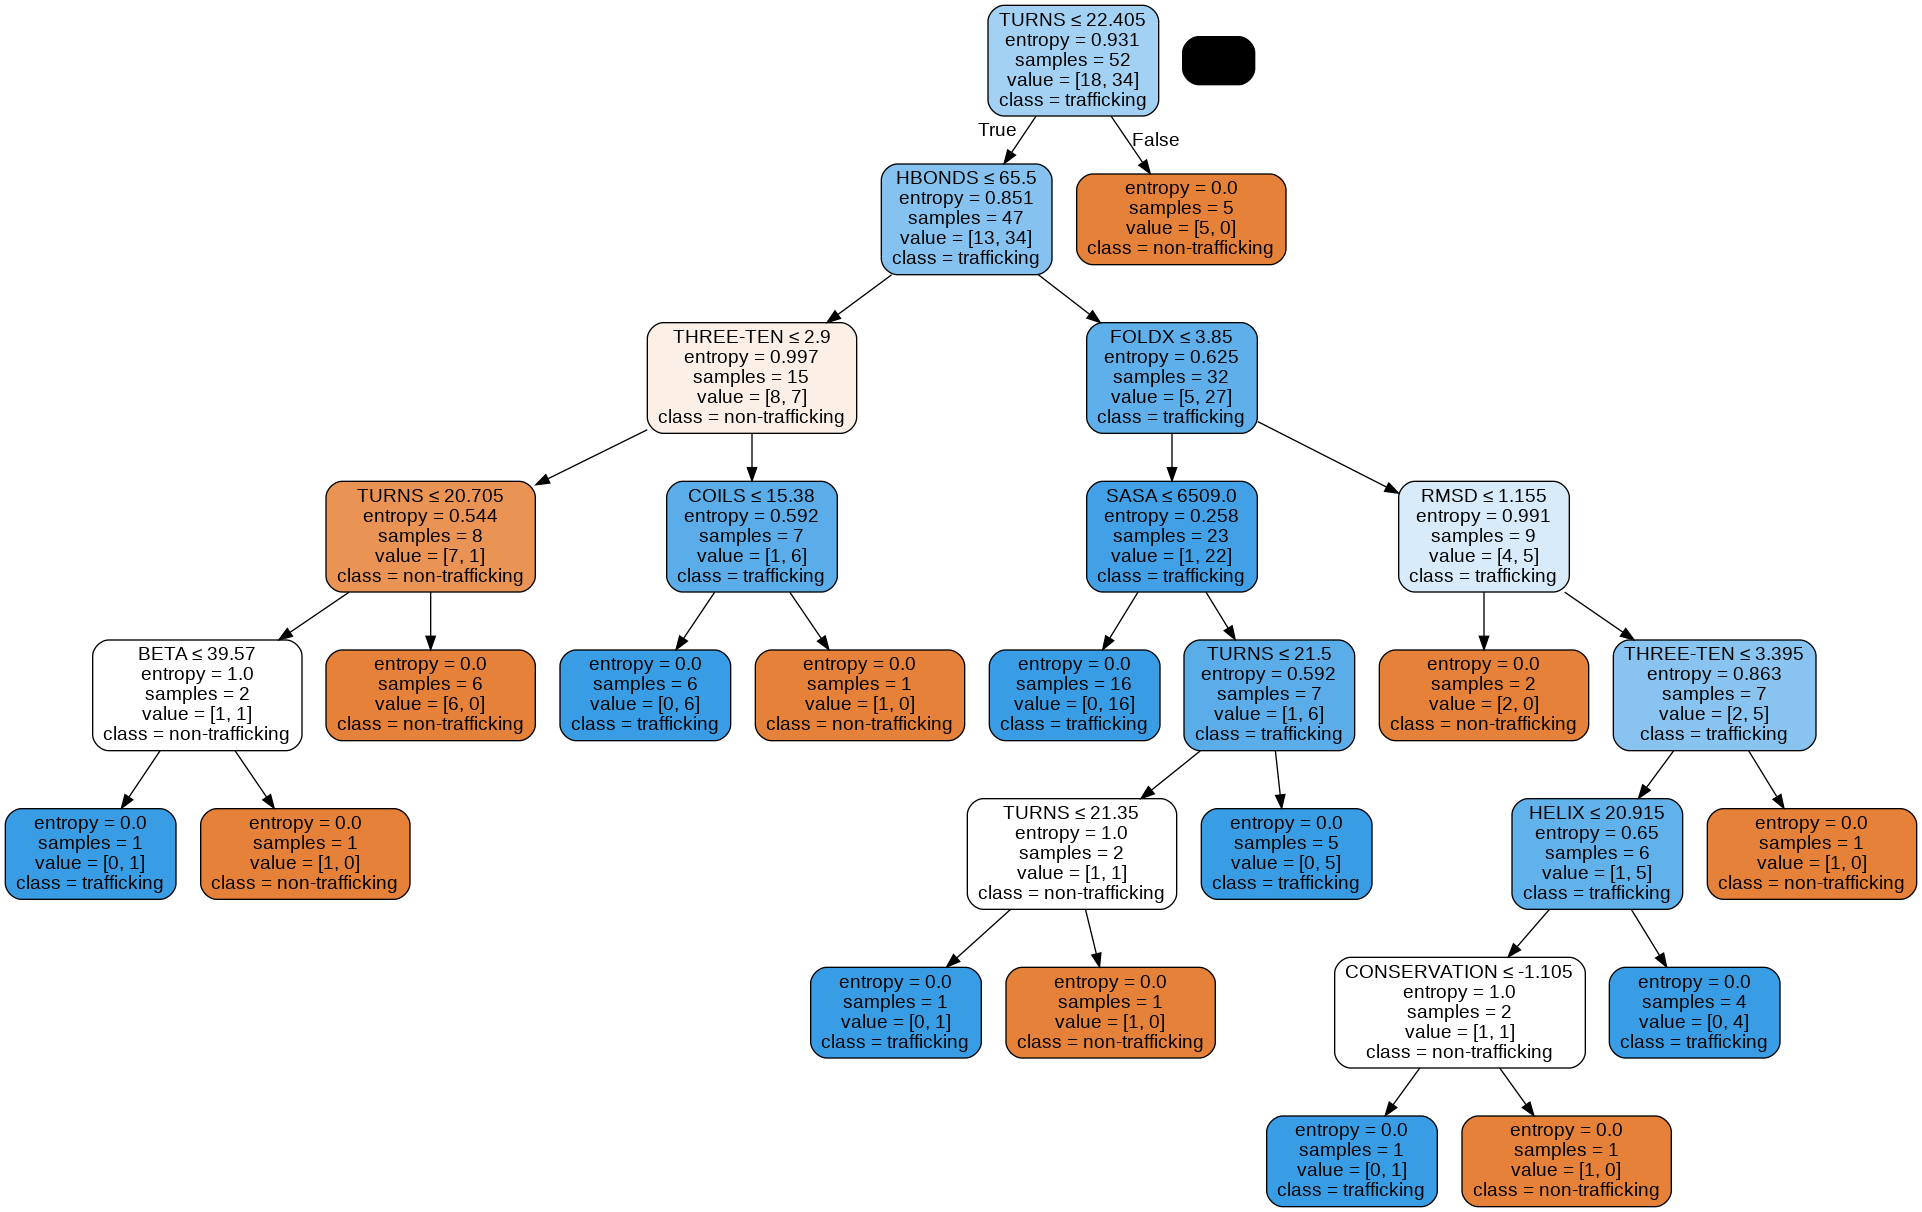

In [ ]:
#classNames=np.array(['0', '1']) # need to verify, but I think this is correct
#classNames=np.array(['benign', 'pathogenic']) # need to verify, but I think this is correct
classNames=np.array(['non-trafficking', 'trafficking']) # need to verify, but I think this is correct
plotDT(clf_entropy,featureNames=features, classNames=classNames)

#plt.savefig('dt_tree_allfeatures.pdf')

In [ ]:
#TestAccuracy(clf_entropy,X_test,Y_test, display=True)
print('Test Accuracy')
TestAccuracy(clf_entropy,X_test,Y_test)

Test Accuracy
Overall accuracy  0.7391304347826086


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_predict = clf_entropy.predict(X_test.values)

#model = lr.fit(X,y)
#probas_ = model.predict_log_proba(X)
#y_predict_proba = model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
### Print overall classification metrics
print(classification_report(Y_test, y_predict, target_names=classNames))
#plt.savefig('report.png')

                 precision    recall  f1-score   support

non-trafficking       0.88      0.58      0.70        12
    trafficking       0.67      0.91      0.77        11

       accuracy                           0.74        23
      macro avg       0.77      0.75      0.73        23
   weighted avg       0.78      0.74      0.73        23



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


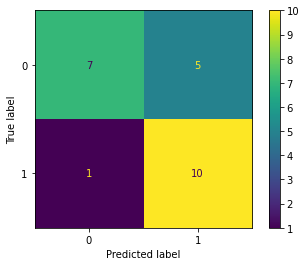

In [ ]:
#print(confusion_matrix(Y_test, y_predict))
plot_confusion_matrix(clf_entropy, X_test, Y_test)
#plt.savefig('dt_cm_allfeatures.pdf')

In [ ]:
#y_predict = clf_entropy.predict(X_test)

#Y_test=np.array(Y_test)
#Y_test2=Y_test.reshape(23,)

#new_ypredict = [int(y) for y in y_predict]
#new_Y_test = [int(f) for f in Y_test2]

#fpr, tpr, thresholds = metrics.roc_curve(new_Y_test, new_ypredict, pos_label=1)

#print ("FPR", fpr*100)
#print ("TPR", tpr*100)
#print ("thresholds", thresholds)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


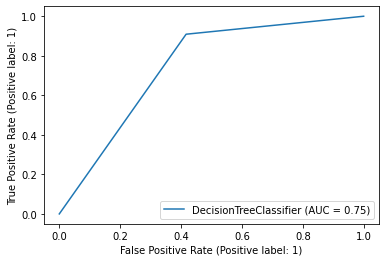

In [ ]:
# plot roc curve
#metrics.roc_curve(clf_entropy, X_test, Y_test)
metrics.plot_roc_curve(clf_entropy, X_test, Y_test)
#plt.savefig('dt_roc_allfeatures.pdf')

Text(0.5, 1.0, 'Feature Importances - All Features (DT)')

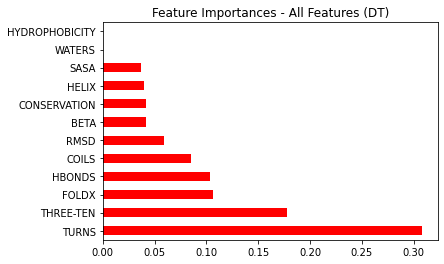

In [ ]:
# print feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', color="red").grid(False)
plt.title('Feature Importances - All Features (DT)')
#plt.legend(bbox_to_anchor=(1,1))
#plt.savefig('dt_fi_allfeatures.png', bbox_inches='tight')

In [ ]:
# Import model and visualizer
#from yellowbrick.model_selection import FeatureImportances
#from sklearn.ensemble import RandomForestClassifier

# Instantiate model and visualizer
#model = RandomForestClassifier(n_estimators=10, random_state=1)
#visualizer = FeatureImportances(model)

# Fit and display visualizer
#visualizer.fit(X, Y)
#visualizer.show();
#plt.savefig('dt_fi_allfeatures2.png', bbox_inches='tight')

predicting probabilities rather than hard predicitons


generate data for ROC curve

In [ ]:
HEX = df[['HELIX']]
B = df[["BETA"]]
T = df[["TURNS"]]
C = df[["COILS"]]
TT = df[["THREE-TEN"]]
R = df[["RMSD"]]
W = df[["WATERS"]]
H = df[["HBONDS"]]
S = df[["SASA"]]
F=df[['FOLDX']]
CO=df[["CONSERVATION"]]
HY=df[["HYDROPHOBICITY"]]

Y = df["TRAFFICKING"]
#X = df[features]

#extracting metrics for whole model
y_predict = clf_entropy.fit(X_train, Y_train).predict_proba(X_test)
#y_predict = clf_entropy.fit(X_train, Y_train).decisions(X_test)
fpr, tpr, thr = metrics.roc_curve(Y_test, y_predict[:,1], drop_intermediate=False)
auc = metrics.auc(fpr, tpr)


#redifined the classifier for one feature
clf2_dt = DecisionTreeClassifier(criterion = "entropy",random_state=50,max_depth=None, min_samples_leaf=1)

#helicity
#split
HEX_train, HEX_test, HEY_train, HEY_test = train_test_split(HEX, Y, train_size=0.7, test_size=0.3, random_state=50)
#train
#modelHE=clf2_dt.fit(HEX_train, HEY_train.values.ravel())
#train
#HEY_predict = clf2_dt.predict(HEX_test.values)
HEY_predict = clf2_dt.fit(HEX_train, HEY_train.values.ravel()).predict_proba(HEX_test.values)
f_helix, t_helix, th_helix = metrics.roc_curve(HEY_test, HEY_predict[:,1], pos_label=1, drop_intermediate=False)
helix_auc = metrics.auc(f_helix, t_helix)

#beta
bx_train, bx_test, by_train, by_test = train_test_split(B, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelB=clf2_dt.fit(bx_train, by_train.values.ravel())
#by_predict = clf2_dt.predict(bx_test.values)
by_predict = clf2_dt.fit(bx_train, by_train).predict_proba(bx_test)
f_beta, t_beta, th_beta = metrics.roc_curve(by_test, by_predict[:,1], pos_label=1, drop_intermediate=False)
beta_auc = metrics.auc(f_beta, t_beta)

#coil
cx_train, cx_test, cy_train, cy_test = train_test_split(C, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelC=clf2_dt.fit(cx_train, cy_train.values.ravel())
#cy_predict = clf2_dt.predict(cx_test.values)
cy_predict = clf2_dt.fit(cx_train, cy_train).predict_proba(cx_test)
f_coil, t_coil, th_coil = metrics.roc_curve(cy_test, cy_predict[:,1], pos_label=1, drop_intermediate=False)
coil_auc = metrics.auc(f_coil, t_coil)

#3-10
ttx_train, ttx_test, tty_train, tty_test = train_test_split(TT, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelTT=clf2_dt.fit(ttx_train, tty_train.values.ravel())
#tty_predict = clf2_dt.predict(ttx_test.values)
tty_predict = clf2_dt.fit(ttx_train, tty_train).predict_proba(ttx_test)
f_tten, t_tten, th_tten = metrics.roc_curve(tty_test, tty_predict[:,1], pos_label=1, drop_intermediate=False)
tten_auc = metrics.auc(f_tten, t_tten)

#rmsd
#extract metrics for rmsd. f_rmsd = false positive rate, t_rmsd=true positive rate, th_rmsd=threshold values
rx_train, rx_test, ry_train, ry_test = train_test_split(R, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelR=clf2_dt.fit(rx_train, ry_train.values.ravel())
#ry_predict = clf2_dt.predict(rx_test.values)
ry_predict = clf2_dt.fit(rx_train, ry_train).predict_proba(rx_test)
f_rmsd, t_rmsd, th_rmsd = metrics.roc_curve(ry_test, ry_predict[:,1], pos_label=1, drop_intermediate=False)
rmsd_auc = metrics.auc(f_rmsd, t_rmsd)

#extract metrics for sasa
sx_train, sx_test, sy_train, sy_test = train_test_split(S, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelS=clf2_dt.fit(sx_train, sy_train.values.ravel())
#sy_predict = clf2_dt.predict(sx_test.values)
sy_predict = clf2_dt.fit(sx_train, sy_train).predict_proba(sx_test)
f_sasa, t_sasa, th_sasa = metrics.roc_curve(sy_test, sy_predict[:,1], pos_label=1, drop_intermediate=False)
sasa_auc = metrics.auc(f_sasa, t_sasa)

#hbonds
#extract metrics for hbonds
hx_train, hx_test, hy_train, hy_test = train_test_split(H, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelH=clf2_dt.fit(hx_train, hy_train.values.ravel())
#hy_predict = clf2_dt.predict(hx_test.values)
hy_predict = clf2_dt.fit(hx_train, hy_train).predict_proba(hx_test)
f_hbonds, t_hbonds, th_hbonds = metrics.roc_curve(hy_test, hy_predict[:,1], pos_label=1, drop_intermediate=False)
hbonds_auc = metrics.auc(f_hbonds, t_hbonds)

#water
#extract metrics for water
wx_train, wx_test, wy_train, wy_test = train_test_split(W, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelW=clf2_dt.fit(wx_train, wy_train.values.ravel())
#wy_predict = clf2_dt.predict(wx_test.values)
wy_predict = clf2_dt.fit(wx_train, wy_train).predict_proba(wx_test)
f_water, t_water, th_water = metrics.roc_curve(wy_test, wy_predict[:,1], pos_label=1)
water_auc = metrics.auc(f_water, t_water)

#turns
tx_train, tx_test, ty_train, ty_test = train_test_split(T, Y, train_size=0.7, test_size=0.3, random_state=50)
modelT=clf2_dt.fit(tx_train, ty_train.values.ravel())
#ty_predict = clf2_dt.predict(tx_test.values)
ty_predict = clf2_dt.fit(tx_train, ty_train).predict_proba(tx_test)
f_turns, t_turns, th_turns = metrics.roc_curve(ty_test, ty_predict[:,1], pos_label=1, drop_intermediate=False)
turns_auc = metrics.auc(f_turns, t_turns)



#foldx
fx_train, fx_test, fy_train, fy_test = train_test_split(F, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelF=clf2_dt.fit(fx_train, fy_train.values.ravel())
#fy_predict = clf2_dt.predict(fx_test.values)
fy_predict = clf2_dt.fit(fx_train, fy_train).predict_proba(fx_test)
f_foldx, t_foldx, th_foldx = metrics.roc_curve(fy_test, fy_predict[:,1], pos_label=1, drop_intermediate=False)
foldx_auc = metrics.auc(f_foldx, t_foldx)

#conservation
cox_train, cox_test, coy_train, coy_test = train_test_split(CO, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelCO=clf2_dt.fit(cox_train, coy_train.values.ravel())
#coy_predict = clf2_dt.predict(cox_test)
coy_score = clf2_dt.fit(cox_train, coy_train).predict_proba(cox_test)
f_cons, t_cons, th_cons = metrics.roc_curve(coy_test, coy_score[:,1], pos_label=1, drop_intermediate=False)
cons_auc = metrics.auc(f_cons, t_cons)

#hydrophobicity
hyx_train, hyx_test, hyy_train, hyy_test = train_test_split(HY, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelHY=clf2_dt.fit(hyx_train, hyy_train.values.ravel())
#hyy_predict = clf2_dt.predict(hyx_test.values)
#hyy_predict = clf2_dt.decision_function(hyx_test.values)
hyy_predict = clf2_dt.fit(hyx_train, hyy_train).predict_proba(hyx_test)
#f_hydr, t_hydr, th_hydr = metrics.roc_curve(hyy_test, hyy_predict)
f_hydr, t_hydr, th_hydr = metrics.roc_curve(hyy_test, hyy_predict[:,1], drop_intermediate=False)
hydr_auc = metrics.auc(f_hydr, t_hydr)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


Plot ROC

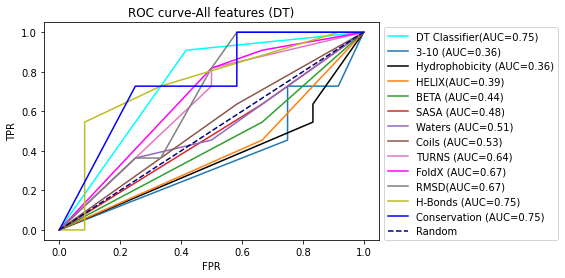

In [ ]:
#plot the roc curves of rmsd, waters and hbonds. auc is area under the curve
#plot_roc_curve(clf_entropy, X_test, Y_test)
plt.plot (fpr, tpr, color='cyan', label="DT Classifier(AUC=%0.2f)"% auc)
plt.plot (f_tten, t_tten, label="3-10 (AUC=%0.2f)"% tten_auc)
plt.plot (f_hydr, t_hydr, color='black', label="Hydrophobicity (AUC=%0.2f)"% hydr_auc)
plt.plot(f_helix, t_helix, label="HELIX(AUC=%0.2f)"% helix_auc)
plt.plot (f_beta, t_beta, label="BETA (AUC=%0.2f)"% beta_auc)
plt.plot (f_sasa, t_sasa, label="SASA (AUC=%0.2f)"% sasa_auc)
plt.plot (f_water, t_water, label="Waters (AUC=%0.2f)"% water_auc)
plt.plot (f_coil, t_coil, label="Coils (AUC=%0.2f)"% coil_auc)
plt.plot (f_turns, t_turns, label="TURNS (AUC=%0.2f)"% turns_auc)
plt.plot (f_foldx, t_foldx, color='magenta', label="FoldX (AUC=%0.2f)"% foldx_auc)
plt.plot(f_rmsd, t_rmsd, label="RMSD(AUC=%0.2f)"% rmsd_auc)
plt.plot (f_hbonds, t_hbonds, label="H-Bonds (AUC=%0.2f)"% hbonds_auc)
plt.plot (f_cons, t_cons, color='blue', label="Conservation (AUC=%0.2f)"% cons_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random')
plt.grid(False)
plt.title('ROC curve-All features (DT)')
plt.xlabel("FPR")
plt.ylabel("TPR")
#plt.legend(loc="lower right")

plt.legend(bbox_to_anchor=(1,1), loc='upper left')
#plt.savefig('dt_roc_allfeatures.pdf', bbox_inches='tight')


plot just the model

In [ ]:
#plt.plot (fpr, tpr, color='black', label="DT(AUC=%0.2f)"% auc)
#plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random')
#plt.title('ROC curve-All features (DT)')
#plt.xlabel("FPR")
#plt.ylabel("TPR")
#plt.legend(loc="lower right")

##plt.legend(bbox_to_anchor=(1,0.9), loc='upper left')
#plt.savefig('dt_roc_allfeatures_justmodel.pdf', bbox_inches='tight')

In [ ]:
#import math
#from math import floor, ceil

#print ("FPR-RMSD", f_rmsd)
#print ("TPR-RMSD", t_rmsd)
#print ("thresholds-RMSD", th_rmsd)

#print ("FPR-WATERS", f_water)
#print ("TPR-WATERS", t_water)
#print ("thresholds-WATERS", th_water)

#print ("FPR-HBONDS", f_hbonds)
#print ("TPR-HBONDS", t_hbonds)
#print ("thresholds-HBONDS", th_hbonds)


In [ ]:
bio_fpr = np.array([0. , 0.5, 1. ])
bio_tpr = np.array([0., 1., 1.])
bio_auc = 0.75

md_fpr = np.array([0.        , 0.41666667, 1.        ])
md_tpr = np.array([0.        , 0.72727273, 1.        ])
md_auc = 0.6553030303030303

Text(0.5, 1.0, 'ROC curve (DT)')

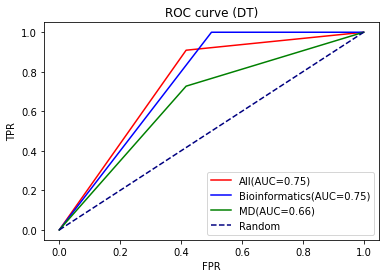

In [ ]:
#plot_roc_curve(clf_rf, X_test, Y_test, color='red', label="All(AUC=%0.2f)")
plt.plot (fpr, tpr, color='red', label="All(AUC=%0.2f)"%auc)
plt.plot (bio_fpr, bio_tpr, color='blue', label="Bioinformatics(AUC=%0.2f)"%bio_auc)
plt.plot (md_fpr, md_tpr, color='green', label="MD(AUC=%0.2f)"%md_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random')

plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC curve (DT)')

#plt.savefig('dt_roc_all_models.pdf', bbox_inches='tight')

Decision tree classifier
Training sample accuracy
Overall accuracy  1.0
Test Accuracy
Overall accuracy  0.6086956521739131
                 precision    recall  f1-score   support

non-trafficking       0.71      0.42      0.53        12
    trafficking       0.56      0.82      0.67        11

       accuracy                           0.61        23
      macro avg       0.64      0.62      0.60        23
   weighted avg       0.64      0.61      0.59        23



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_conf

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

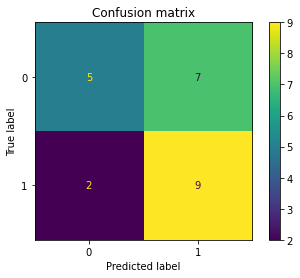

<Figure size 432x288 with 0 Axes>

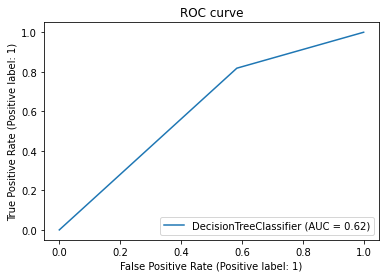

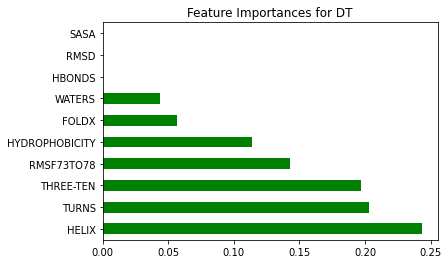

In [ ]:
outputs = mlUtil.MLClassifier(df,tags,output,classifier="DT", display=display) 
cases['DT'] = outputs

In [ ]:
dir(outputs)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

#### Random forest classifier 

Example with PAS data

In [ ]:
dataFile = "feature_sets/features-latest-sets1n2.txt"

#tab seperated columns
#df = pd.read_csv(dataFile, sep="\t", comment='#')
#df = pd.read_csv("data/cereal.csv", skiprows = 1)

#space seperated columns
#df = pd.read_csv(dataFile, delimiter=" ", comment='#')

#variable seperated columns use "\s+"
df = pd.read_csv(dataFile, sep="\s+", comment='#')

#df.columns = df.iloc[0]
#df=df.drop(df.index[0])
#print(df.head(5))
df.head()

,VARIANT,HELIX,TURNS,COILS,THREE-TEN,BETA,ISOLATED,RMSD,HBONDS,SASA,WATERS,FOLDX,CONSERVATION,HYDROPHOBICITY,CLASS,TRAFFICKING
0,a32t,21.1567,21.2058,14.4202,3.29401,39.6439,0.279349,1.23560,66.7186,6473.83,1479.93,3.763310,-0.549,-0.43,1,1
1,a57p,20.4290,21.8332,14.5935,3.53135,39.4690,0.144014,1.28151,66.0936,6477.76,1526.79,-0.764827,-0.312,-0.32,0,1
2,a78p,20.8206,21.3096,14.5379,3.19232,39.9190,0.220522,1.12505,65.8526,6479.56,1474.41,0.759351,1.487,-0.32,1,1
3,a85v,20.8686,21.4237,14.6775,3.12031,39.6774,0.232523,1.16450,65.4562,6544.62,1492.34,2.430410,-0.518,0.29,1,1
4,c108r,22.1452,21.1476,15.3975,2.75727,38.2283,0.324033,1.58552,62.7131,6753.12,1548.93,6.958320,0.745,-1.84,1,0


fix decimals

In [ ]:
#df['decimal_place_2'] = df['decimal_place_2'].round(2)
df['HELIX'] = df['HELIX'].round(2)
df['TURNS'] = df['TURNS'].round(2)
df['COILS'] = df['COILS'].round(2)
df['THREE-TEN'] = df['THREE-TEN'].round(2)
df['BETA'] = df['BETA'].round(2)
df['RMSD'] = df['RMSD'].round(2)
df['HBONDS'] = df['HBONDS'].round()
df['SASA'] = df['SASA'].round()
df['WATERS'] = df['WATERS'].round()
df['FOLDX'] = df['FOLDX'].round(2)
df['CONSERVATION'] = df['CONSERVATION'].round(2)
df['HYDROPHOBICITY'] = df['HYDROPHOBICITY'].round(2)

df.head()

,VARIANT,HELIX,TURNS,COILS,THREE-TEN,BETA,ISOLATED,RMSD,HBONDS,SASA,WATERS,FOLDX,CONSERVATION,HYDROPHOBICITY,CLASS,TRAFFICKING
0,a32t,21.16,21.21,14.42,3.29,39.64,0.279349,1.24,67.0,6474.0,1480.0,3.76,-0.55,-0.43,1,1
1,a57p,20.43,21.83,14.59,3.53,39.47,0.144014,1.28,66.0,6478.0,1527.0,-0.76,-0.31,-0.32,0,1
2,a78p,20.82,21.31,14.54,3.19,39.92,0.220522,1.13,66.0,6480.0,1474.0,0.76,1.49,-0.32,1,1
3,a85v,20.87,21.42,14.68,3.12,39.68,0.232523,1.16,65.0,6545.0,1492.0,2.43,-0.52,0.29,1,1
4,c108r,22.15,21.15,15.40,2.76,38.23,0.324033,1.59,63.0,6753.0,1549.0,6.96,0.74,-1.84,1,0


In [ ]:
df1=df.drop(columns='ISOLATED')
df1.head()

,VARIANT,HELIX,TURNS,COILS,THREE-TEN,BETA,RMSD,HBONDS,SASA,WATERS,FOLDX,CONSERVATION,HYDROPHOBICITY,CLASS,TRAFFICKING
0,a32t,21.16,21.21,14.42,3.29,39.64,1.24,67.0,6474.0,1480.0,3.76,-0.55,-0.43,1,1
1,a57p,20.43,21.83,14.59,3.53,39.47,1.28,66.0,6478.0,1527.0,-0.76,-0.31,-0.32,0,1
2,a78p,20.82,21.31,14.54,3.19,39.92,1.13,66.0,6480.0,1474.0,0.76,1.49,-0.32,1,1
3,a85v,20.87,21.42,14.68,3.12,39.68,1.16,65.0,6545.0,1492.0,2.43,-0.52,0.29,1,1
4,c108r,22.15,21.15,15.40,2.76,38.23,1.59,63.0,6753.0,1549.0,6.96,0.74,-1.84,1,0


describe the data

In [ ]:
df.describe()

,HELIX,TURNS,COILS,THREE-TEN,BETA,ISOLATED,RMSD,HBONDS,SASA,WATERS,FOLDX,CONSERVATION,HYDROPHOBICITY,CLASS,TRAFFICKING
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,20.800800,21.582133,14.698000,3.074267,39.594133,0.250196,1.241733,65.826667,6505.360000,1473.533333,3.909867,-0.326267,-0.159333,0.733333,0.600000
std,0.871427,0.745283,0.752649,0.424812,0.867415,0.145460,0.165508,1.256048,73.217122,24.819529,5.305551,0.705097,0.859411,0.553449,0.493197
min,16.250000,20.380000,13.560000,0.960000,35.250000,0.050270,1.020000,63.000000,6393.000000,1419.000000,-1.290000,-1.400000,-2.330000,-1.000000,0.000000
25%,20.605000,21.165000,14.240000,2.930000,39.355000,0.166652,1.140000,65.000000,6459.500000,1457.000000,0.705000,-0.810000,-0.580000,1.000000,0.000000
50%,20.940000,21.460000,14.670000,3.090000,39.720000,0.220522,1.190000,66.000000,6487.000000,1469.000000,1.810000,-0.590000,-0.170000,1.000000,1.000000
75%,21.215000,21.780000,15.085000,3.240000,40.180000,0.287279,1.300000,67.000000,6535.500000,1488.000000,4.685000,0.040000,0.385000,1.000000,1.000000
max,22.420000,24.980000,19.030000,4.770000,40.700000,0.853585,1.960000,68.000000,6753.000000,1549.000000,26.360000,2.320000,2.170000,1.000000,1.000000


In [ ]:
features=["HELIX","TURNS","COILS","THREE-TEN","BETA","RMSD","HBONDS","SASA","WATERS","FOLDX","CONSERVATION","HYDROPHOBICITY"]
#features1=["TURNS","HBONDS","WATERS","FOLDX","CONSERVATION"]

output = ["TRAFFICKING"]

#X = df[features1]
X = df[features]
Y = df[output]

In [ ]:
X.head()
#Y.head()

,HELIX,TURNS,COILS,THREE-TEN,BETA,RMSD,HBONDS,SASA,WATERS,FOLDX,CONSERVATION,HYDROPHOBICITY
0,21.16,21.21,14.42,3.29,39.64,1.24,67.0,6474.0,1480.0,3.76,-0.55,-0.43
1,20.43,21.83,14.59,3.53,39.47,1.28,66.0,6478.0,1527.0,-0.76,-0.31,-0.32
2,20.82,21.31,14.54,3.19,39.92,1.13,66.0,6480.0,1474.0,0.76,1.49,-0.32
3,20.87,21.42,14.68,3.12,39.68,1.16,65.0,6545.0,1492.0,2.43,-0.52,0.29
4,22.15,21.15,15.40,2.76,38.23,1.59,63.0,6753.0,1549.0,6.96,0.74,-1.84


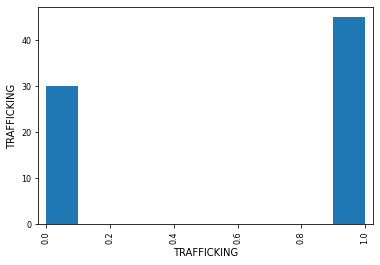

In [ ]:
from pandas.plotting import scatter_matrix

#show target data distribution
scatter_matrix(Y)
#plt.show()
plt.savefig('target-data-distribution.pdf')

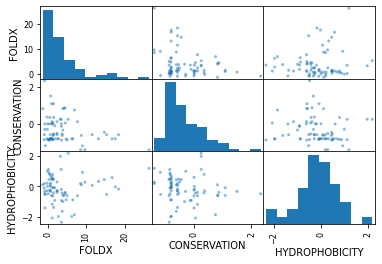

<Figure size 432x288 with 0 Axes>

In [ ]:
#show bioinformatics scores spread
sliced = X.iloc[:,9:12]
scatter_matrix(sliced)
plt.show()
plt.savefig('bioinformatics-data-distribution.pdf')
#print(sliced)

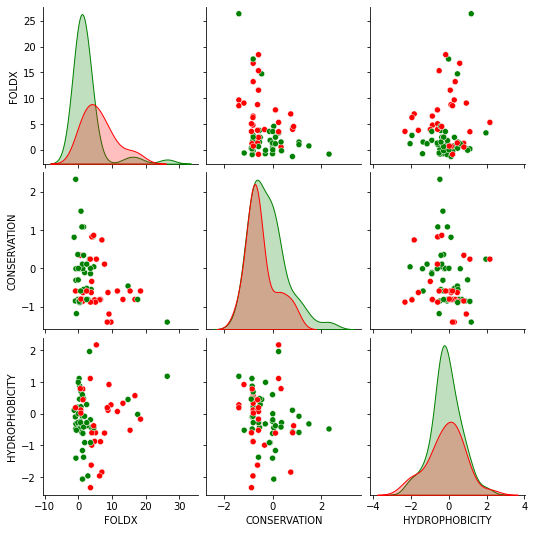

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sns
from sklearn import datasets

df_BIO = df[['FOLDX', 'CONSERVATION', 'HYDROPHOBICITY', 'TRAFFICKING', ]]
# Create pairplot of all the variables with hue set to traff
plot = sns.pairplot(df_BIO, hue='TRAFFICKING', palette=['Red', 'Green']) 
plot._legend.remove()
plt.show()
plt.savefig('bioinformatics-data-distribution2.pdf')

<Figure size 1440x1440 with 0 Axes>

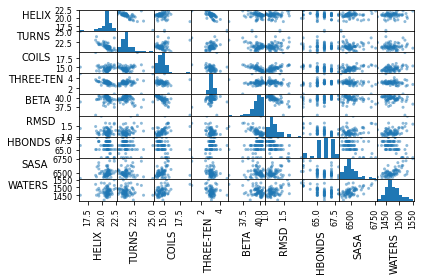

In [ ]:
#show md scores spread
plt.figure(figsize=(20,20))

labels = ['HELIX','TURNS','COILS','THREE-TEN','BETA','RMSD','HBONDS','SASA','WATERS']
sliced = X.iloc[:,0:9]
axes = pd.plotting.scatter_matrix(sliced)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)

plt.savefig('md-distribution.pdf')

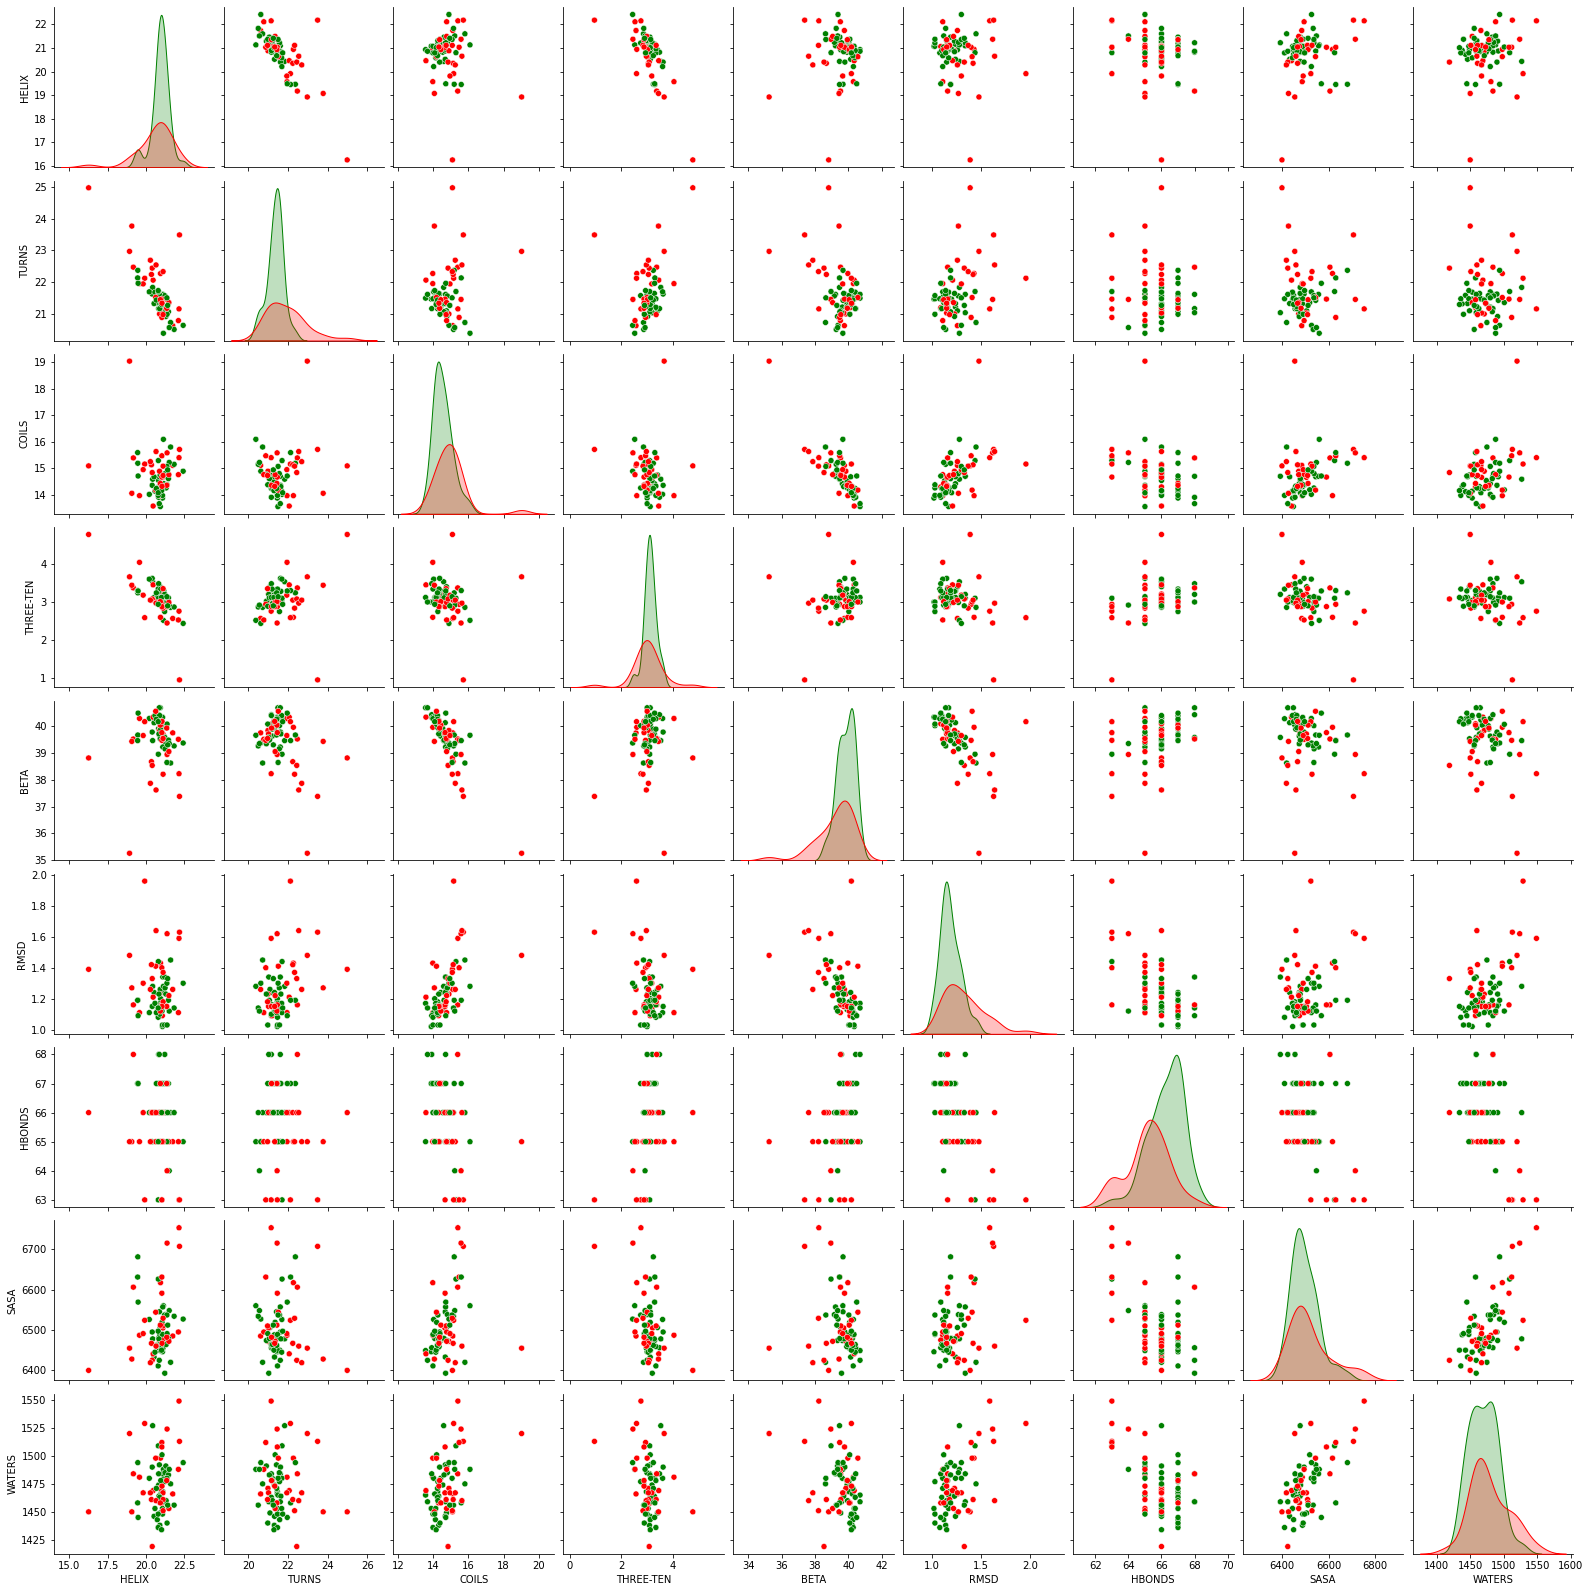

In [ ]:
df_MD = df[["HELIX","TURNS","COILS","THREE-TEN","BETA","RMSD","HBONDS","SASA","WATERS", "TRAFFICKING"]]

plot = sns.pairplot(df_MD, hue='TRAFFICKING', palette=['Red', 'Green']) 
plot._legend.remove()
#plot.set_xticklabels(plot.get_xmajorticklabels(), fontsize = 18)

#b = sns.violinplot(y = "Draughts", data = df)
#b.set_yticklabels(b.get_yticks(), size = 15)

plt.savefig('md-data-distribution2.pdf')


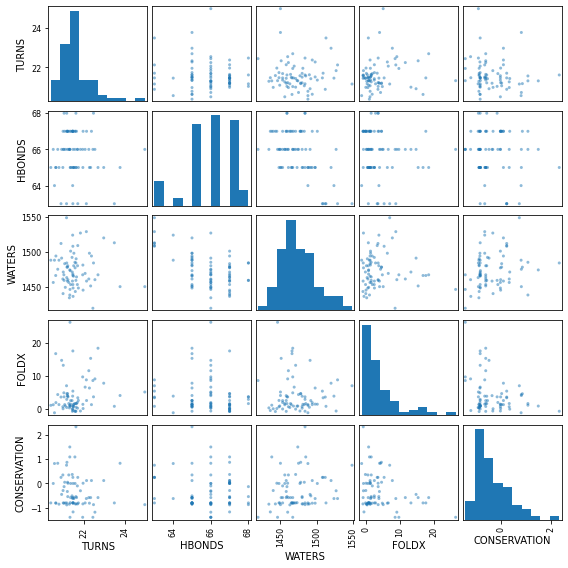

In [ ]:
#plt.figure(figsize=(20,20))
#labels = ['HELIX','TURNS','COILS','THREE-TEN','BETA','RMSD','HBONDS','SASA','WATERS']
labels=["TURNS","HBONDS","WATERS","FOLDX","CONSERVATION"]
#sliced = X.iloc[:,0:9]
sliced = df[labels]

axes = pd.plotting.scatter_matrix(sliced, figsize=[8,8])
#plt.axis('square')

for ax in axes.flatten():
    #ax.xaxis.label.set_rotation(90)
    ax.xaxis.label.set_rotation(0)
#    ax.yaxis.label.set_rotation(0)
#    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0.05, hspace=0.1)

plt.savefig('best-features-distribution.pdf')


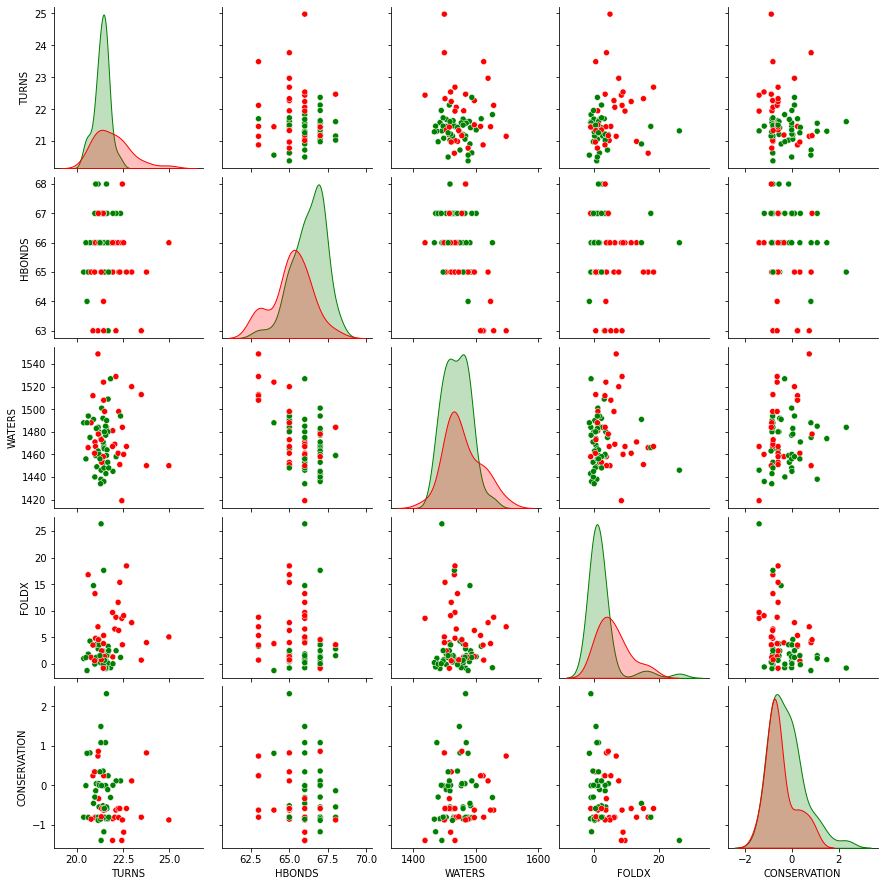

In [ ]:
df_best = df[["TURNS","HBONDS","WATERS", "FOLDX", "CONSERVATION", "TRAFFICKING"]]

plot = sns.pairplot(df_best, hue='TRAFFICKING', palette=['Red', 'Green']) 
plot._legend.remove()

#b = sns.violinplot(y = "Draughts", data = df)
#b.set_yticklabels(b.get_yticks(), size = 15)

plt.savefig('best-data-distribution2.pdf')


In [ ]:
#figsize=[5,5]
#import seaborn as sns
#labels=["TURNS","HBONDS","WATERS","FOLDX","CONSERVATION"]
#sliced = df[labels]

#sns.set()
#p = sns.pairplot(data=sliced)
#p = sns.lineplot(data = df)
#p.set_xlabel("X-Axis", fontsize = 20)
#p.set_ylabel("Y-Axis", fontsize = 20)
#p.set_title("Plot", fontsize = 20)
#plt.legend(labels=["Legend_Day1","Legend_Day2"], fontsize = 20)

#plt.savefig('best-features-distribution2.pdf')

In [ ]:
#data transformation/normalizing
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler().fit(X)
#rescaledX = scaler.transform(X)
#np.set_printoptions(precision=3)
#print(rescaledX[0:,:])


In [ ]:
#split the data for training

X_train, X_test, Y_train, Y_test =\
train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=50)


Data looks very unbalanced

In [ ]:
### upsample the minority class, which is benign (class 2 = 0)

In [ ]:
# concatenate our traning data back together
#C = pd.concat([X_train, Y_train], axis=1)

In [ ]:
# seperate minority and majority classes
#group = C.groupby('class')
#benign=list(group)[0][1]
#pathogenic=list(group)[1][1]

In [ ]:
#upsample minority
#benign_upsampled = resample(benign,
#                            replace=True, #sample with replacement
#                            n_samples=len(pathogenic), #match number in majority class
#                            random_state=100 #reproduce results
#                           )

In [ ]:
#combine majority and upsampled minority
#upsampled = pd.concat([pathogenic, benign_upsampled])

In [ ]:
#nEntries = np.shape(Y_train)[0]
#nTrue = np.sum(Y_train=='1')
#print("%f of nEntries are 1"%(nTrue/nEntries))

use "selectFromModel" from sklearn to automatically select the features. SelectFromModel will select those features which importance is greater than the mean importance of all the features by default

In [ ]:
#initializing the classifier and fitting it
#clf_rf = RandomForestClassifier(bootstrap=True, n_estimators=100, criterion="entropy", random_state=50)
clf_rf = RandomForestClassifier(bootstrap=True, n_estimators=10000, criterion="entropy", max_depth=None, max_features=4, max_leaf_nodes=None,
min_samples_leaf=1, min_samples_split=2, random_state=50)

#clf_rf = SelectFromModel(RandomForestClassifier(bootstrap=True, n_estimators=100, criterion="entropy"))

In [ ]:
# train the classifier with resampled data
#X_train=pd.DataFrame(upsampled, columns=["waters", "hbonds", "rmsd"])
#Y_train=pd.DataFrame(upsampled, columns=["class"])
model=clf_rf.fit(X_train, Y_train.values.ravel())

In [ ]:
#k-fold crossvalidation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(model, X, Y.values.ravel(), cv=kfold)

In [ ]:
print(results)
print(results.mean())


[1.         0.5        0.75       0.75       0.625      0.85714286
 0.71428571 0.57142857 0.71428571 0.71428571]
0.7196428571428571


To see which features are important we can use "get_support" method on the fitted model.



In [ ]:
#model.get_support()

In [ ]:
#make a list and count the selected features.
#selected_feat= X_train.columns[(model.get_support())]
#len(selected_feat)

In [ ]:
#get the name of the features selected
#print(selected_feat)

In [ ]:
#pd.Series(model.estimator_,feature_importances_,.ravel()).hist()

In [ ]:
#zip now returns an iterable
#for i in zip(features, clf_rf.feature_importances_*100):
#    print (i)

In [ ]:
# print training accuracy
print("Training sample accuracy")
TestAccuracy(clf_rf, X_train, Y_train)

Training sample accuracy


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Overall accuracy  1.0


In [ ]:
#classNames=np.array(['0', '1']) # need to verify, but I think this is correct
#classNames=np.array(['benign', 'pathogenic']) # need to verify, but I think this is correct
classNames=np.array(['non-trafficking', 'trafficking']) # need to verify, but I think this is correct

In [ ]:
#TestAccuracy(clf_entropy,X_test,Y_test, display=True)
print('Test Accuracy')
TestAccuracy(clf_rf,X_test,Y_test)

Test Accuracy


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Overall accuracy  0.7391304347826086


In [ ]:
y_predict = clf_rf.predict(X_test)

In [ ]:
### Print overall classification metrics
print(classification_report(Y_test, y_predict, target_names=classNames))
plt.savefig('rf_summary_latest.pdf')

                 precision    recall  f1-score   support

non-trafficking       0.88      0.58      0.70        12
    trafficking       0.67      0.91      0.77        11

       accuracy                           0.74        23
      macro avg       0.77      0.75      0.73        23
   weighted avg       0.78      0.74      0.73        23



<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


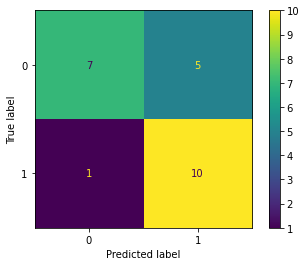

In [ ]:
#print(confusion_matrix(Y_test, y_predict))
plot_confusion_matrix(clf_rf, X_test, Y_test)
plt.savefig('rf_confusion_matrix_latest.pdf')

In [ ]:
#extracting metrics for roc curve

y_predict = clf_rf.predict(X_test)
Y_test=np.array(Y_test)
Y_test2=Y_test.reshape(23,)

new_ypredict = [int(y) for y in y_predict]
new_Y_test = [int(f) for f in Y_test2]

#metrics.roc_curve(y_true, y_predict, pos_label=1)
fpr, tpr, thresholds = metrics.roc_curve(new_Y_test, new_ypredict, pos_label=1)
#fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predict, pos_label=1)

#print ("FPR", fpr*100)
#print ("TPR", tpr*100)
#print ("thresholds", thresholds)

In [ ]:
# predicting probabilities rather than hard class

y_predict = clf_rf.fit(X_train,Y_train.values.ravel()).predict_proba(X_test)
fpr, tpr, thr = metrics.roc_curve(Y_test, y_predict[:,1])
auc = metrics.auc(fpr, tpr)

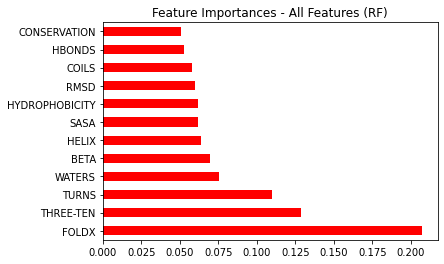

In [ ]:
# print feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', color="red")
plt.title('Feature Importances - All Features (RF)')
plt.savefig('rf_fi_allfeatures.png',bbox_inches='tight')

generate data for ROC curve

In [ ]:
HEX = df[['HELIX']]
B = df[["BETA"]]
T = df[["TURNS"]]
C = df[["COILS"]]
TT = df[["THREE-TEN"]]
R = df[["RMSD"]]
W = df[["WATERS"]]
H = df[["HBONDS"]]
S = df[["SASA"]]
F=df[['FOLDX']]
CO=df[["CONSERVATION"]]
HY=df[["HYDROPHOBICITY"]]

Y = df["TRAFFICKING"]
#X = df[features]

#redifined the classifier for one feature
clf2_rf = RandomForestClassifier(bootstrap=True, n_estimators=10000, criterion="entropy", max_depth=None, max_leaf_nodes=None,
min_samples_leaf=1, min_samples_split=2, random_state=50)

y_predict = clf_rf.fit(X_train,Y_train.values.ravel()).predict_proba(X_test)
fpr, tpr, thr = metrics.roc_curve(Y_test, y_predict[:,1])
auc = metrics.auc(fpr, tpr)


#helicity
HEX_train, HEX_test, HEY_train, HEY_test = train_test_split(HEX, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelHE=clf2_rf.fit(HEX_train, HEY_train.values.ravel())
#HEY_predict = clf2_rf.predict(HEX_test.values)
HEY_predict = clf2_rf.fit(HEX_train, HEY_train).predict_proba(HEX_test)
f_helix, t_helix, th_helix = metrics.roc_curve(HEY_test, HEY_predict[:,1], pos_label=1)
helix_auc = metrics.auc(f_helix, t_helix)

#beta
bx_train, bx_test, by_train, by_test = train_test_split(B, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelB=clf2_rf.fit(bx_train, by_train.values.ravel())
#by_predict = clf2_rf.predict(bx_test.values)
by_predict = clf2_rf.fit(bx_train, by_train).predict_proba(bx_test)
f_beta, t_beta, th_beta = metrics.roc_curve(by_test, by_predict[:,1], pos_label=1)
beta_auc = metrics.auc(f_beta, t_beta)

#coil
cx_train, cx_test, cy_train, cy_test = train_test_split(C, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelC=clf2_rf.fit(cx_train, cy_train.values.ravel())
#cy_predict = clf2_rf.predict(cx_test.values)
cy_predict = clf2_rf.fit(cx_train, cy_train).predict_proba(cx_test)
f_coil, t_coil, th_coil = metrics.roc_curve(cy_test, cy_predict[:,1], pos_label=1)
coil_auc = metrics.auc(f_coil, t_coil)

#3-10
ttx_train, ttx_test, tty_train, tty_test = train_test_split(TT, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelTT=clf2_rf.fit(ttx_train, tty_train.values.ravel())
#tty_predict = clf2_rf.predict(ttx_test.values)
tty_predict = clf2_rf.fit(ttx_train, tty_train).predict_proba(ttx_test)
f_tten, t_tten, th_tten = metrics.roc_curve(tty_test, tty_predict[:,1], pos_label=1)
tten_auc = metrics.auc(f_tten, t_tten)

#rmsd
#extract metrics for rmsd. f_rmsd = false positive rate, t_rmsd=true positive rate, th_rmsd=threshold values
rx_train, rx_test, ry_train, ry_test = train_test_split(R, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelR=clf2_rf.fit(rx_train, ry_train.values.ravel())
#ry_predict = clf2_rf.predict(rx_test.values)
ry_predict = clf2_rf.fit(rx_train, ry_train).predict_proba(rx_test)
f_rmsd, t_rmsd, th_rmsd = metrics.roc_curve(ry_test, ry_predict[:,1], pos_label=1)
rmsd_auc = metrics.auc(f_rmsd, t_rmsd)

#extract metrics for sasa
sx_train, sx_test, sy_train, sy_test = train_test_split(S, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelS=clf2_rf.fit(sx_train, sy_train.values.ravel())
#sy_predict = clf2_rf.predict(sx_test.values)
sy_predict = clf2_rf.fit(sx_train, sy_train).predict_proba(sx_test)
f_sasa, t_sasa, th_sasa = metrics.roc_curve(sy_test, sy_predict[:,1], pos_label=1)
sasa_auc = metrics.auc(f_sasa, t_sasa)

#hbonds
#extract metrics for hbonds
hx_train, hx_test, hy_train, hy_test = train_test_split(H, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelH=clf2_dt.fit(hx_train, hy_train.values.ravel())
#hy_predict = clf2_dt.predict(hx_test.values)
hy_predict = clf2_rf.fit(hx_train, hy_train).predict_proba(hx_test)
f_hbonds, t_hbonds, th_hbonds = metrics.roc_curve(hy_test, hy_predict[:,1], pos_label=1, drop_intermediate=False)
hbonds_auc = metrics.auc(f_hbonds, t_hbonds)

#water
#extract metrics for water
wx_train, wx_test, wy_train, wy_test = train_test_split(W, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelW=clf2_dt.fit(wx_train, wy_train.values.ravel())
#wy_predict = clf2_dt.predict(wx_test.values)
wy_predict = clf2_rf.fit(wx_train, wy_train).predict_proba(wx_test)
f_water, t_water, th_water = metrics.roc_curve(wy_test, wy_predict[:,1], pos_label=1)
water_auc = metrics.auc(f_water, t_water)

#turns
tx_train, tx_test, ty_train, ty_test = train_test_split(T, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelT=clf2_dt.fit(tx_train, ty_train.values.ravel())
#ty_predict = clf2_dt.predict(tx_test.values)
ty_predict = clf2_rf.fit(tx_train, ty_train).predict_proba(tx_test)
f_turns, t_turns, th_turns = metrics.roc_curve(ty_test, ty_predict[:,1], pos_label=1, drop_intermediate=False)
turns_auc = metrics.auc(f_turns, t_turns)


#foldx
fx_train, fx_test, fy_train, fy_test = train_test_split(F, Y, train_size=0.7, test_size=0.3, random_state=50)
modelF=clf2_rf.fit(fx_train, fy_train.values.ravel())
#fy_predict = clf2_dt.predict(fx_test.values)
fy_predict = clf2_rf.fit(fx_train, fy_train).predict_proba(fx_test)
f_foldx, t_foldx, th_foldx = metrics.roc_curve(fy_test, fy_predict[:,1], pos_label=1, drop_intermediate=False)
foldx_auc = metrics.auc(f_foldx, t_foldx)

#hydrophobicity
hyx_train, hyx_test, hyy_train, hyy_test = train_test_split(HY, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelHY=clf2_dt.fit(hyx_train, hyy_train.values.ravel())
#hyy_predict = clf2_dt.predict(hyx_test.values)
#hyy_predict = clf2_dt.decision_function(hyx_test.values)
hyy_predict = clf2_rf.fit(hyx_train, hyy_train).predict_proba(hyx_test)
#f_hydr, t_hydr, th_hydr = metrics.roc_curve(hyy_test, hyy_predict)
f_hydr, t_hydr, th_hydr = metrics.roc_curve(hyy_test, hyy_predict[:,1], drop_intermediate=False)
hydr_auc = metrics.auc(f_hydr, t_hydr)

#conservation
cox_train, cox_test, coy_train, coy_test = train_test_split(CO, Y, train_size=0.7, test_size=0.3, random_state=50)
#modelCO=clf2_dt.fit(cox_train, coy_train.values.ravel())
#coy_predict = clf2_dt.predict(cox_test)
coy_score = clf2_rf.fit(cox_train, coy_train).predict_proba(cox_test)
f_cons, t_cons, th_cons = metrics.roc_curve(coy_test, coy_score[:,1], pos_label=1, drop_intermediate=False)
cons_auc = metrics.auc(f_cons, t_cons)

#for i in range(n_classes):
#   fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#   roc_auc[i] = auc(fpr[i], tpr[i])

training a model with subset of features

In [ ]:
X_sub = df[features]
X_sub = df[features].drop(columns=["CONSERVATION", "HYDROPHOBICITY"])
X_sub.head()

,HELIX,TURNS,COILS,THREE-TEN,BETA,RMSD,HBONDS,SASA,WATERS,FOLDX
0,21.16,21.21,14.42,3.29,39.64,1.24,67.0,6474.0,1480.0,3.76
1,20.43,21.83,14.59,3.53,39.47,1.28,66.0,6478.0,1527.0,-0.76
2,20.82,21.31,14.54,3.19,39.92,1.13,66.0,6480.0,1474.0,0.76
3,20.87,21.42,14.68,3.12,39.68,1.16,65.0,6545.0,1492.0,2.43
4,22.15,21.15,15.40,2.76,38.23,1.59,63.0,6753.0,1549.0,6.96


In [ ]:
#foldx
xsub_train, xsub_test, ysub_train, ysub_test = train_test_split(X_sub, Y, train_size=0.7, test_size=0.3, random_state=50)

modelX_sub = clf2_rf.fit(xsub_train, ysub_train.values.ravel())

ysub_predict = clf2_rf.fit(xsub_train, ysub_train).predict_proba(xsub_test)


In [ ]:
#reshape the data
#sec stru
#HE_new = np.array(HE)
#HE_new = HE_new.reshape(75,)
#HE_new = [int(he) for he in HE_new]

Plot ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


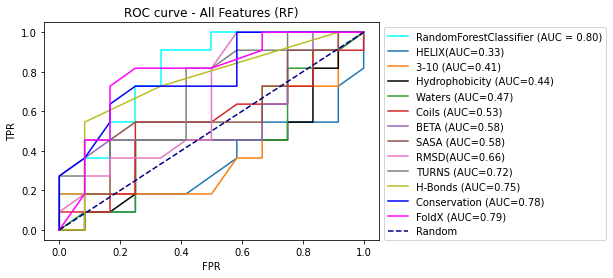

In [ ]:
#plot the roc curves of rmsd, waters and hbonds. auc is area under the curve
#plt.figure(figsize=(5, 5))
plot_roc_curve(clf_rf, X_test, Y_test, color='cyan')
plt.plot(f_helix, t_helix, label="HELIX(AUC=%0.2f)"% helix_auc)
plt.plot (f_tten, t_tten, label="3-10 (AUC=%0.2f)"% tten_auc)
plt.plot (f_hydr, t_hydr, color='black', label="Hydrophobicity (AUC=%0.2f)"% hydr_auc)
plt.plot (f_water, t_water, label="Waters (AUC=%0.2f)"% water_auc)
plt.plot (f_coil, t_coil, label="Coils (AUC=%0.2f)"% coil_auc)
plt.plot (f_beta, t_beta, label="BETA (AUC=%0.2f)"% beta_auc)
plt.plot (f_sasa, t_sasa, label="SASA (AUC=%0.2f)"% sasa_auc)
plt.plot(f_rmsd, t_rmsd, label="RMSD(AUC=%0.2f)"% rmsd_auc)
plt.plot (f_turns, t_turns, label="TURNS (AUC=%0.2f)"% turns_auc)
plt.plot (f_hbonds, t_hbonds, label="H-Bonds (AUC=%0.2f)"% hbonds_auc)
plt.plot (f_cons, t_cons, color='blue', label="Conservation (AUC=%0.2f)"% cons_auc)
plt.plot (f_foldx, t_foldx, color='magenta', label="FoldX (AUC=%0.2f)"% foldx_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random')

plt.title('ROC curve - All Features (RF)')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.savefig('rf_roc_all_features.pdf', bbox_inches='tight')

In [ ]:
#plot just the model

#plot_roc_curve(clf_rf, X_test, Y_test)
#plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random')

#plt.title('ROC curve-All features (RF)')
#plt.xlabel("FPR")
#plt.ylabel("TPR")
#plt.legend(loc="upper left")

#plt.legend(loc='lower right')
#plt.savefig('rf_roc_all_features_onlymodel.pdf', bbox_inches='tight')



In [ ]:
#import math
#from math import floor, ceil

#print ("FPR-RMSD", f_rmsd)
#print ("TPR-RMSD", t_rmsd)
#print ("thresholds-RMSD", th_rmsd)

roc metrics for bioinformatics and md models

In [ ]:
bio_fpr = np.array([0., 0., 0., 0.16666667, 0.16666667, 0.41666667, 0.41666667, 0.5, 0.5       , 1.        ])
bio_tpr = np.array([0., 0.09090909, 0.36363636, 0.36363636, 0.81818182, 0.81818182, 0.90909091, 0.90909091, 1., 1.])
bio_auc = 0.8409090909090908

md_fpr = np.array([0., 0., 0., 0.08333333, 0.08333333, 0.41666667, 0.41666667, 0.5, 0.5, 0.58333333, 0.58333333, 1.])
md_tpr = np.array([0., 0.09090909, 0.27272727, 0.27272727, 0.36363636, 0.36363636, 0.63636364, 0.63636364, 0.90909091, 0.90909091, 1., 1.])
md_auc = 0.6893939393939394

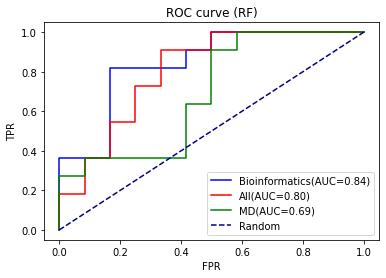

In [ ]:
#plot_roc_curve(clf_rf, X_test, Y_test, color='red', label="All(AUC=%0.2f)")
plt.plot (bio_fpr, bio_tpr, color='blue', label="Bioinformatics(AUC=%0.2f)"%bio_auc)
plt.plot (fpr, tpr, color='red', label="All(AUC=%0.2f)"%auc)
plt.plot (md_fpr, md_tpr, color='green', label="MD(AUC=%0.2f)"%md_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random')

plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC curve (RF)')

plt.savefig('rf_roc_all_models.pdf', bbox_inches='tight')

col e/good reads variants predictions

In [ ]:
#dataFilecole = "final-foldxscores.txt"
dataFilecole = "feature_sets/cole_dataset.txt"

df_cole = pd.read_csv(dataFilecole, sep="\s+", comment='#')
df_cole.head()

,VARIANT,FOLDX,VARIANT.1,HELIX,TURNS,COILS,THREE-TEN,BETA,ISOLATED,RMSD,HBONDS,SASA,WATERS
0,A79T,-0.049102,A79T,21.6228,21.2128,15.0569,2.60102,39.3429,0.163544,1.27965,65.6247,6559.70,1485.27
1,C39R,-1.423360,C39R,20.3325,21.2333,14.8515,2.97363,40.4753,0.133756,1.05869,66.4880,6448.80,1453.63
2,C49S,0.432678,C49S,21.3508,21.1868,15.4224,2.73748,39.0399,0.262601,1.25251,65.3736,6535.40,1465.43
3,D119H,0.130417,D119H,20.9646,20.4171,15.3741,3.06922,39.8931,0.281871,1.15795,65.4479,6496.82,1601.38
4,D46E,0.013278,D46E,21.2072,20.7323,15.2426,3.24756,39.3218,0.248621,1.22506,65.2309,6504.14,1466.84


In [ ]:
#F_cole=df_cole[['FOLDX']]
F_cole=df_cole[["HELIX","TURNS","COILS","THREE-TEN","BETA","RMSD","HBONDS","SASA","WATERS","FOLDX"]]
                
#cole_predictions = modelF.predict(F_cole)
cole_predictions = modelX_sub.predict(F_cole)

dataframe=pd.DataFrame(cole_predictions)
#dataframe=pd.DataFrame(cole_predictions, df_cole[['VARIANT']])
dataframe.columns =['Prediction']

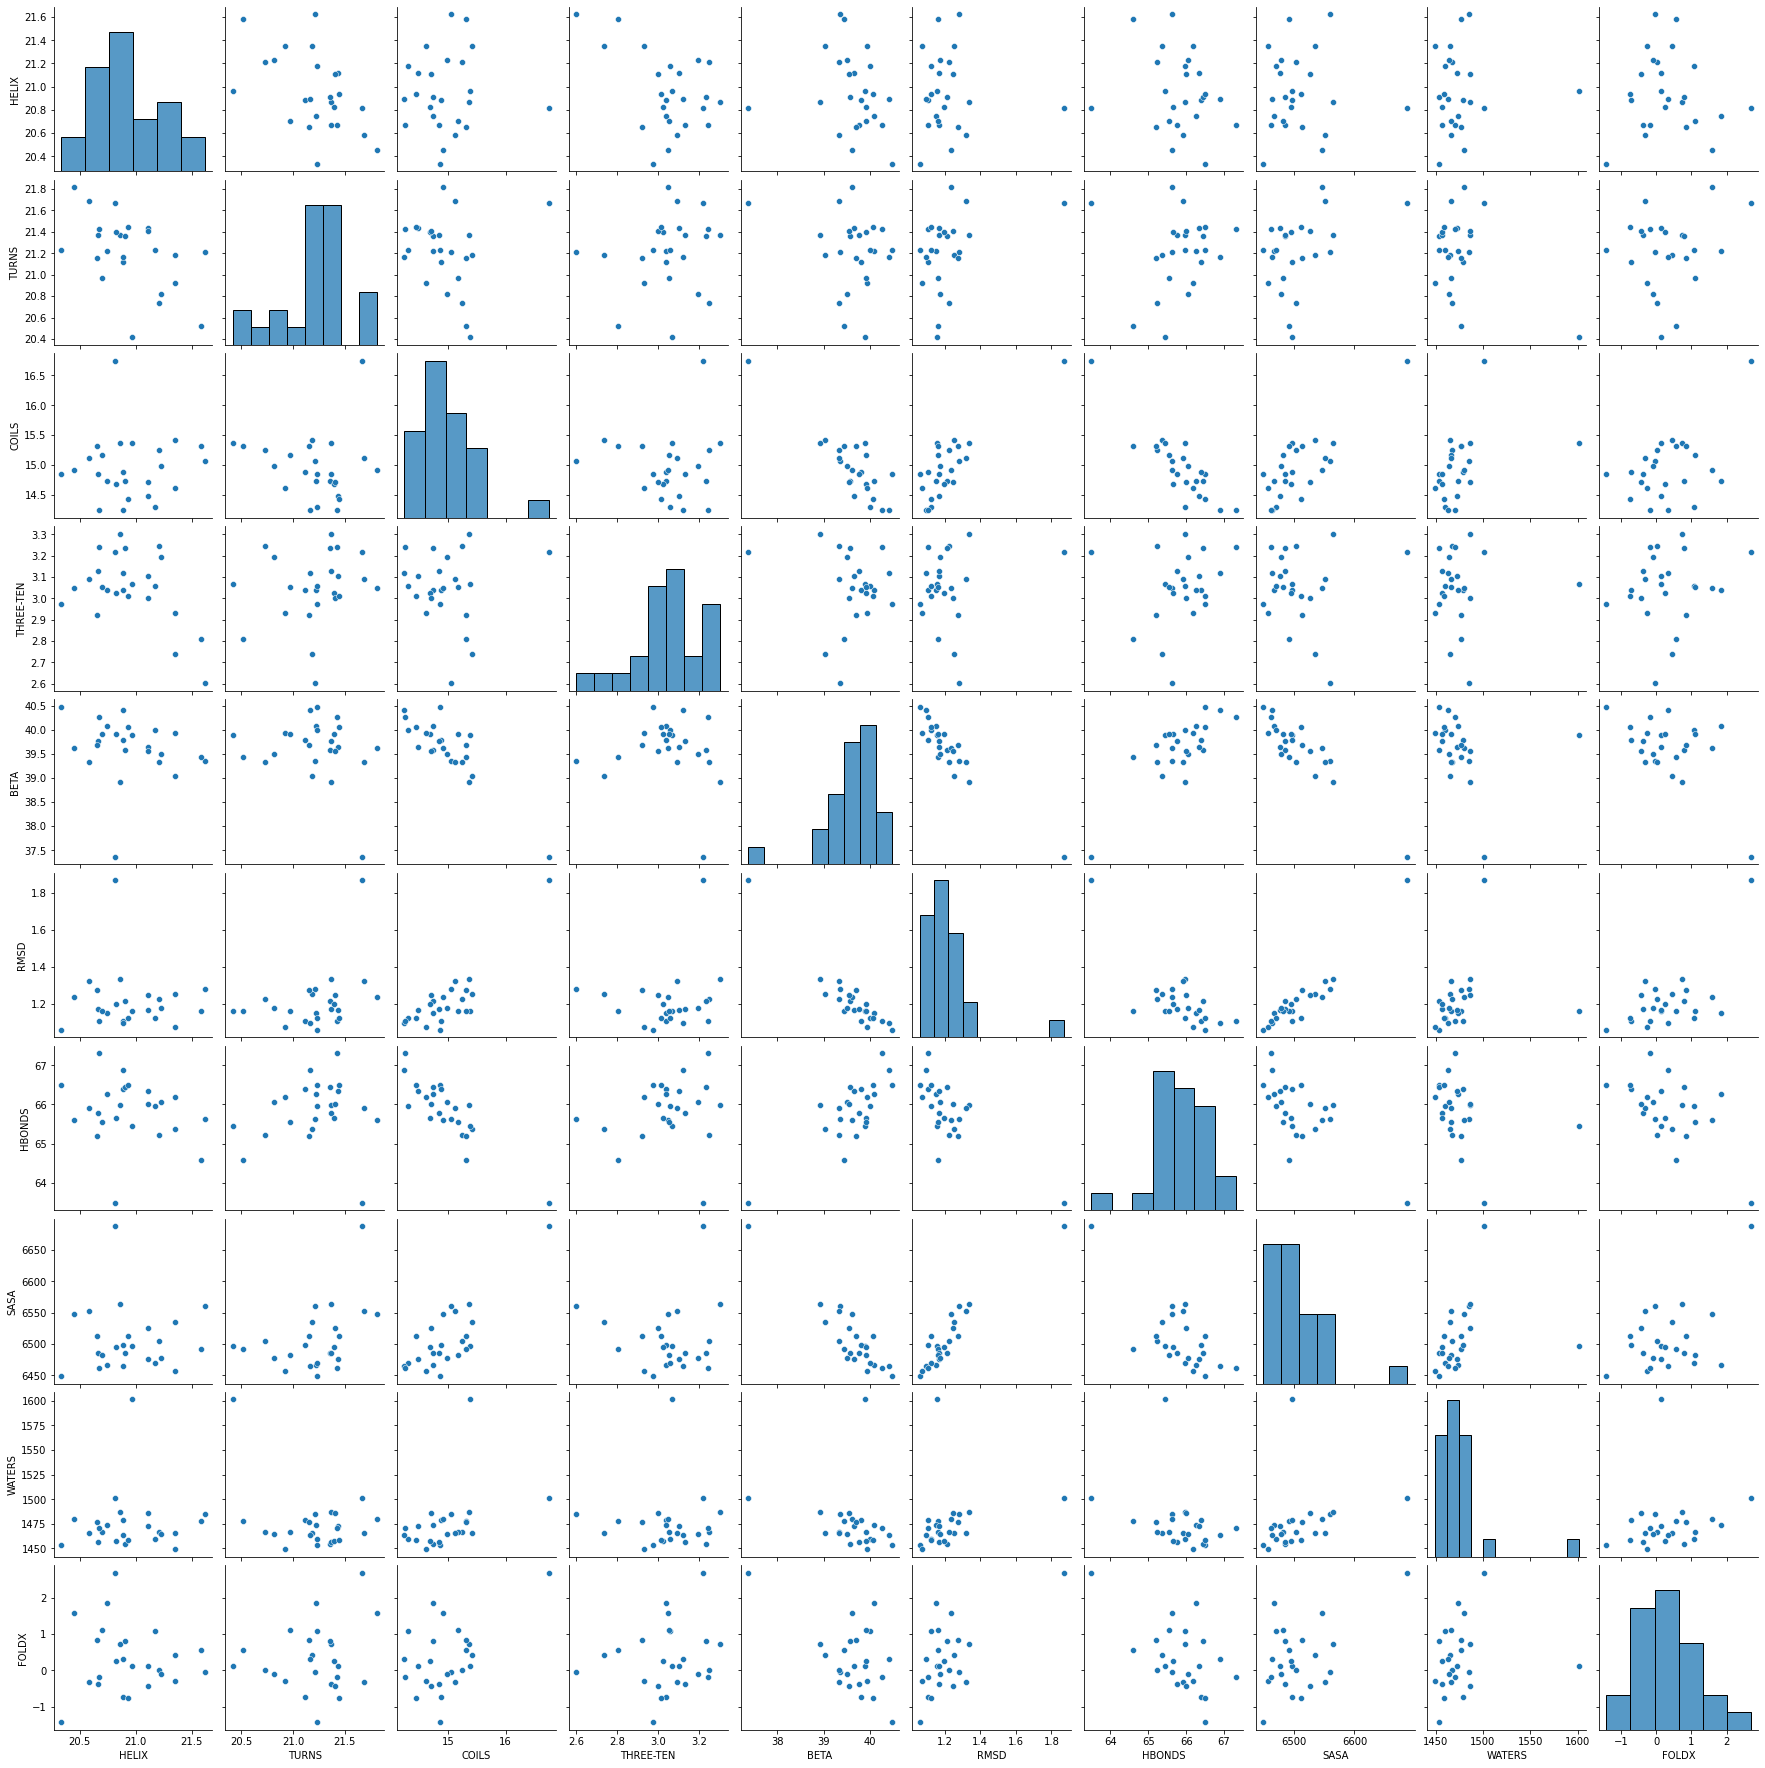

In [ ]:
#plot = sns.pairplot(df_best, hue='TRAFFICKING', palette=['Red', 'Green']) 
plot = sns.pairplot(F_cole) 

#plot._legend.remove()

#plt.savefig('best-data-distribution2.pdf')

In [ ]:
frames = [df_cole[['VARIANT']], dataframe]
result = pd.concat(frames, axis=1)
result.to_csv('good_reads_predictions.txt', index=False, sep="\t")
result


,VARIANT,Prediction
0,A79T,1
1,C39R,1
2,C49S,1
3,D119H,1
4,D46E,1
5,D46N,1
6,F98L,1
7,L107P,1
8,L87R,1
9,M124I,1


/content/herg/mlUtil.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=clf.fit(X_train, Y_train)


Training sample accuracy


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Overall accuracy  1.0
Test Accuracy


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Overall accuracy  0.6956521739130435


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


                 precision    recall  f1-score   support

non-trafficking       0.86      0.50      0.63        12
    trafficking       0.62      0.91      0.74        11

       accuracy                           0.70        23
      macro avg       0.74      0.70      0.69        23
   weighted avg       0.75      0.70      0.68        23



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

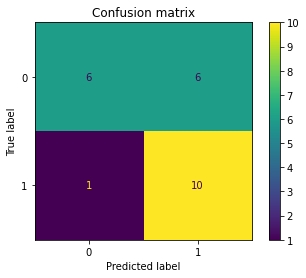

<Figure size 432x288 with 0 Axes>

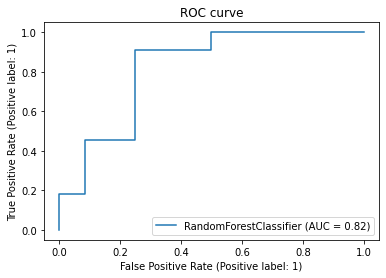

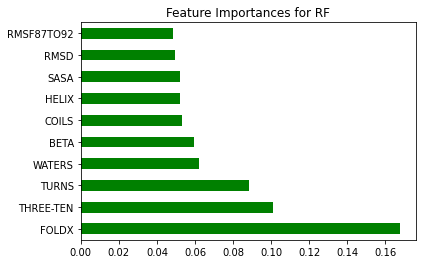

In [ ]:
outputs = mlUtil.MLClassifier(df,tags,output,classifier="RF",display=display) 
cases['RF'] = outputs

#### Support vector machines
- Implemented, but not working correctly just yet

<span style="color:red">NEED TO PULL IN CURRENT IMPLEMENTATION</span>.

Example with hERG data

In [ ]:
dataFile = "feature_sets/features-latest-sets1n2.txt"
df = pd.read_csv(dataFile, sep="\s+", comment='#')
df.head()

,VARIANT,HELIX,TURNS,COILS,THREE-TEN,BETA,ISOLATED,RMSD,HBONDS,SASA,WATERS,FOLDX,CONSERVATION,HYDROPHOBICITY,CLASS,TRAFFICKING
0,a32t,21.1567,21.2058,14.4202,3.29401,39.6439,0.279349,1.23560,66.7186,6473.83,1479.93,3.763310,-0.549,-0.43,1,1
1,a57p,20.4290,21.8332,14.5935,3.53135,39.4690,0.144014,1.28151,66.0936,6477.76,1526.79,-0.764827,-0.312,-0.32,0,1
2,a78p,20.8206,21.3096,14.5379,3.19232,39.9190,0.220522,1.12505,65.8526,6479.56,1474.41,0.759351,1.487,-0.32,1,1
3,a85v,20.8686,21.4237,14.6775,3.12031,39.6774,0.232523,1.16450,65.4562,6544.62,1492.34,2.430410,-0.518,0.29,1,1
4,c108r,22.1452,21.1476,15.3975,2.75727,38.2283,0.324033,1.58552,62.7131,6753.12,1548.93,6.958320,0.745,-1.84,1,0


In [ ]:
df['HELIX'] = df['HELIX'].round(2)
df['TURNS'] = df['TURNS'].round(2)
df['COILS'] = df['COILS'].round(2)
df['THREE-TEN'] = df['THREE-TEN'].round(2)
df['BETA'] = df['BETA'].round(2)
df['RMSD'] = df['RMSD'].round(2)
df['HBONDS'] = df['HBONDS'].round()
df['SASA'] = df['SASA'].round()
df['WATERS'] = df['WATERS'].round()
df['FOLDX'] = df['FOLDX'].round(2)
df['CONSERVATION'] = df['CONSERVATION'].round(2)
df['HYDROPHOBICITY'] = df['HYDROPHOBICITY'].round(2)
#df.head()

In [ ]:
df1=df.drop(columns='ISOLATED')
#df1.head()

In [ ]:
features=["HELIX","TURNS","COILS","THREE-TEN","BETA","RMSD","HBONDS","SASA","WATERS","FOLDX","CONSERVATION","HYDROPHOBICITY"]
output = ["TRAFFICKING"]

#X = df[features1]
X = df[features]
Y = df[output]

In [ ]:
#from pandas import DataFrame

#scaler = MinMaxScaler()
#model=scaler.fit(X)
#scaledX=model.transform(X)
#X = DataFrame(scaledX)

In [ ]:
X_train, X_test, Y_train, Y_test =\
  train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=50)

Data looks very unbalanced

In [ ]:
### upsample the minority class, which is benign (class 2 = 0)

In [ ]:
# concatenate our traning data back together
#C = pd.concat([X_train, Y_train], axis=1)

In [ ]:
#group = C.groupby('TRAFFICKING')
#trafficking=list(group)[1][1]
#nontrafficking=list(group)[0][1]

In [ ]:
#nontrafficking_upsampled = resample(nontrafficking,
#                            replace=True, #sample with replacement
#                            n_samples=len(trafficking), #match number in majority class
#                            random_state=50 #reproduce results
 #       )

In [ ]:
#combine majority and upsampled minority
#upsampled = pd.concat([trafficking, nontrafficking_upsampled])

Using class_weight="balanced" to reweight classes based on class frequency

In [ ]:
#initializing the classifier and fitting it. using linear kernel since it is easy to plot feature importance, for others hard to interpret
clf_svm = SVC(gamma='auto', random_state=50, max_iter=10000, kernel='linear', probability=True)

In [ ]:
# train the classifier with resampled data
#X_train=pd.DataFrame(upsampled, columns=["HELIX","TURNS","COILS","THREE-TEN","BETA","RMSD","HBONDS","SASA","WATERS","FOLDX","CONSERVATION","HYDROPHOBICITY"])
#Y_train=pd.DataFrame(upsampled, columns=["TRAFFICKING"])

model=clf_svm.fit(X_train, Y_train.values.ravel())
#model=clf_svm.fit(scaledX_train, Y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
# print training accuracy
print("Training sample accuracy")
TestAccuracy(clf_svm, X_train, Y_train)
#TestAccuracy(clf_svm, scaledX_train, Y_train)

Training sample accuracy
Overall accuracy  0.7884615384615384


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#classNames=np.array(['0', '1']) # need to verify, but I think this is correct
classNames=np.array(['non-trafficking', 'trafficking']) # need to verify, but I think this is correct
#plotDT(clf_entropy,featureNames=features, classNames=classNames)

In [ ]:
#TestAccuracy(clf_entropy,X_test,Y_test, display=True)
print('Test Accuracy')
TestAccuracy(clf_svm, X_test, Y_test)

Test Accuracy
Overall accuracy  0.782608695652174


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_predict = clf_svm.predict(X_test.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Print overall classification metrics
print(classification_report(Y_test, y_predict, target_names=classNames))

                 precision    recall  f1-score   support

non-trafficking       0.89      0.67      0.76        12
    trafficking       0.71      0.91      0.80        11

       accuracy                           0.78        23
      macro avg       0.80      0.79      0.78        23
   weighted avg       0.81      0.78      0.78        23



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


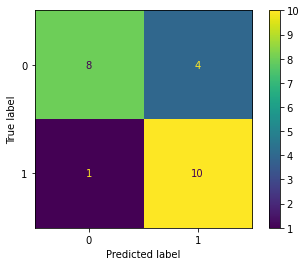

In [ ]:
#print(confusion_matrix(Y_test, y_predict))
plot_confusion_matrix(clf_svm, X_test, Y_test)
plt.savefig('svm_cm.pdf')

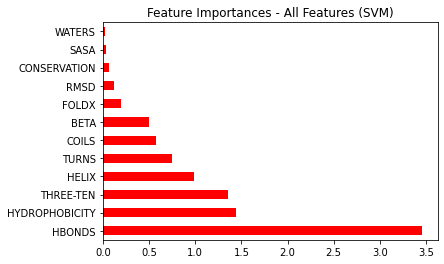

In [ ]:
# print feature importance
#this option to plot importance features only apply to linear kernel in SVM
pd.Series(abs(clf_svm.coef_[0]), index=X.columns).nlargest(15).plot(kind='barh', color="red")
plt.title('Feature Importances - All Features (SVM)')
plt.savefig('svm_fi_allfeatures.png', bbox_inches='tight')

In [ ]:
HEX = df[['HELIX']]
B = df[["BETA"]]
T = df[["TURNS"]]
C = df[["COILS"]]
TT = df[["THREE-TEN"]]
R = df[["RMSD"]]
W = df[["WATERS"]]
H = df[["HBONDS"]]
S = df[["SASA"]]
F=df[['FOLDX']]
CO=df[["CONSERVATION"]]
HY=df[["HYDROPHOBICITY"]]

Y = df["TRAFFICKING"]

#redifined the classifier for one feature
clf_svm = SVC(gamma='auto', random_state=50, max_iter=10000, kernel='linear', probability=True)

#entire model
y_predict = clf_svm.fit(X_train,Y_train.values.ravel()).predict_proba(X_test)
fpr, tpr, thr = metrics.roc_curve(Y_test, y_predict[:,1])
auc = metrics.auc(fpr, tpr)


#helicity
HEX_train, HEX_test, HEY_train, HEY_test = train_test_split(HEX, Y, train_size=0.7, test_size=0.3, random_state=50)
HEY_predict = clf_svm.fit(HEX_train, HEY_train).predict_proba(HEX_test)
f_helix, t_helix, th_helix = metrics.roc_curve(HEY_test, HEY_predict[:,1], pos_label=1)
helix_auc = metrics.auc(f_helix, t_helix)

#beta
bx_train, bx_test, by_train, by_test = train_test_split(B, Y, train_size=0.7, test_size=0.3, random_state=50)
by_predict = clf_svm.fit(bx_train, by_train).predict_proba(bx_test)
f_beta, t_beta, th_beta = metrics.roc_curve(by_test, by_predict[:,1], pos_label=1)
beta_auc = metrics.auc(f_beta, t_beta)

#coil
cx_train, cx_test, cy_train, cy_test = train_test_split(C, Y, train_size=0.7, test_size=0.3, random_state=50)
cy_predict = clf_svm.fit(cx_train, cy_train).predict_proba(cx_test)
f_coil, t_coil, th_coil = metrics.roc_curve(cy_test, cy_predict[:,1], pos_label=1)
coil_auc = metrics.auc(f_coil, t_coil)

#3-10
ttx_train, ttx_test, tty_train, tty_test = train_test_split(TT, Y, train_size=0.7, test_size=0.3, random_state=50)
tty_predict = clf_svm.fit(ttx_train, tty_train).predict_proba(ttx_test)
f_tten, t_tten, th_tten = metrics.roc_curve(tty_test, tty_predict[:,1], pos_label=1)
tten_auc = metrics.auc(f_tten, t_tten)

#rmsd
#extract metrics for rmsd. f_rmsd = false positive rate, t_rmsd=true positive rate, th_rmsd=threshold values
rx_train, rx_test, ry_train, ry_test = train_test_split(R, Y, train_size=0.7, test_size=0.3, random_state=50)
ry_predict = clf_svm.fit(rx_train, ry_train).predict_proba(rx_test)
f_rmsd, t_rmsd, th_rmsd = metrics.roc_curve(ry_test, ry_predict[:,1], pos_label=1)
rmsd_auc = metrics.auc(f_rmsd, t_rmsd)

#extract metrics for sasa
sx_train, sx_test, sy_train, sy_test = train_test_split(S, Y, train_size=0.7, test_size=0.3, random_state=50)
sy_predict = clf_svm.fit(sx_train, sy_train).predict_proba(sx_test)
f_sasa, t_sasa, th_sasa = metrics.roc_curve(sy_test, sy_predict[:,1], pos_label=1)
sasa_auc = metrics.auc(f_sasa, t_sasa)

#hbonds
#extract metrics for hbonds
hx_train, hx_test, hy_train, hy_test = train_test_split(H, Y, train_size=0.7, test_size=0.3, random_state=50)
hy_predict = clf_svm.fit(hx_train, hy_train).predict_proba(hx_test)
f_hbonds, t_hbonds, th_hbonds = metrics.roc_curve(hy_test, hy_predict[:,1], pos_label=1, drop_intermediate=False)
hbonds_auc = metrics.auc(f_hbonds, t_hbonds)

#water
#extract metrics for water
wx_train, wx_test, wy_train, wy_test = train_test_split(W, Y, train_size=0.7, test_size=0.3, random_state=50)
wy_predict = clf_svm.fit(wx_train, wy_train).predict_proba(wx_test)
f_water, t_water, th_water = metrics.roc_curve(wy_test, wy_predict[:,1], pos_label=1)
water_auc = metrics.auc(f_water, t_water)

#turns
tx_train, tx_test, ty_train, ty_test = train_test_split(T, Y, train_size=0.7, test_size=0.3, random_state=50)
ty_predict = clf_svm.fit(tx_train, ty_train).predict_proba(tx_test)
f_turns, t_turns, th_turns = metrics.roc_curve(ty_test, ty_predict[:,1], pos_label=1, drop_intermediate=False)
turns_auc = metrics.auc(f_turns, t_turns)

#foldx
fx_train, fx_test, fy_train, fy_test = train_test_split(F, Y, train_size=0.7, test_size=0.3, random_state=50)

fy_predict = clf_svm.fit(fx_train, fy_train).predict_proba(fx_test)
f_foldx, t_foldx, th_foldx = metrics.roc_curve(fy_test, fy_predict[:,1], pos_label=1, drop_intermediate=False)
foldx_auc = metrics.auc(f_foldx, t_foldx)

#hydrophobicity
hyx_train, hyx_test, hyy_train, hyy_test = train_test_split(HY, Y, train_size=0.7, test_size=0.3, random_state=50)
hyy_predict = clf_svm.fit(hyx_train, hyy_train).predict_proba(hyx_test)
f_hydr, t_hydr, th_hydr = metrics.roc_curve(hyy_test, hyy_predict[:,1], drop_intermediate=False)
hydr_auc = metrics.auc(f_hydr, t_hydr)

#conservation
cox_train, cox_test, coy_train, coy_test = train_test_split(CO, Y, train_size=0.7, test_size=0.3, random_state=50)
coy_score = clf_svm.fit(cox_train, coy_train).predict_proba(cox_test)
f_cons, t_cons, th_cons = metrics.roc_curve(coy_test, coy_score[:,1], pos_label=1, drop_intermediate=False)
cons_auc = metrics.auc(f_cons, t_cons)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


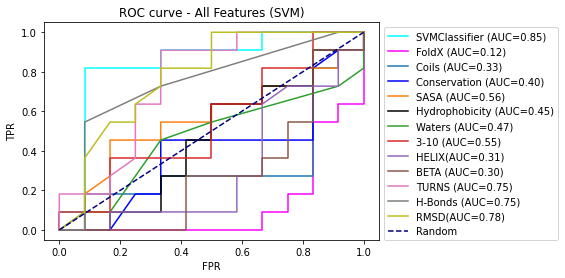

In [ ]:
#plot the roc curves of rmsd, waters and hbonds. auc is area under the curve
#plt.figure(figsize=(5, 5))
#plot_roc_curve(clf_svm, X_test, Y_test, color='cyan')
plt.plot (fpr, tpr, color='cyan', label="SVMClassifier (AUC=%0.2f)"%auc)
plt.plot (f_foldx, t_foldx, color='magenta', label="FoldX (AUC=%0.2f)"% foldx_auc)
plt.plot (f_coil, t_coil, label="Coils (AUC=%0.2f)"% coil_auc)
plt.plot (f_cons, t_cons, color='blue', label="Conservation (AUC=%0.2f)"% cons_auc)
plt.plot (f_sasa, t_sasa, label="SASA (AUC=%0.2f)"% sasa_auc)
plt.plot (f_hydr, t_hydr, color='black', label="Hydrophobicity (AUC=%0.2f)"% hydr_auc)
plt.plot (f_water, t_water, label="Waters (AUC=%0.2f)"% water_auc)
plt.plot (f_tten, t_tten, label="3-10 (AUC=%0.2f)"% tten_auc)
plt.plot(f_helix, t_helix, label="HELIX(AUC=%0.2f)"% helix_auc)
plt.plot (f_beta, t_beta, label="BETA (AUC=%0.2f)"% beta_auc)
plt.plot (f_turns, t_turns, label="TURNS (AUC=%0.2f)"% turns_auc)
plt.plot (f_hbonds, t_hbonds, label="H-Bonds (AUC=%0.2f)"% hbonds_auc)
plt.plot(f_rmsd, t_rmsd, label="RMSD(AUC=%0.2f)"% rmsd_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random')

plt.title('ROC curve - All Features (SVM)')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.savefig('svm_roc_all_features.pdf', bbox_inches='tight')

In [ ]:

outputs = mlUtil.MLClassifier(df,tags,output,classifier="SVM",display=display) 
cases['SVM'] = outputs

VERY BUGGY/INSUFFICIENT IMPLEMENTATION
Training sample accuracy
Overall accuracy  0.6538461538461539
Test Accuracy
Overall accuracy  0.4782608695652174
                 precision    recall  f1-score   support

non-trafficking       0.00      0.00      0.00        12
    trafficking       0.48      1.00      0.65        11

       accuracy                           0.48        23
      macro avg       0.24      0.50      0.32        23
   weighted avg       0.23      0.48      0.31        23

BOWING OUT UNTIL I CAN RESOLVE SOME BUGS WITH SVMS


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precis

In [ ]:
bio_fpr = np.array([0,         0.08333333, 0.66666667, 0.66666667, 0.75,       0.75,
 0.83333333, 0.83333333, 0.91666667, 0.91666667, 1,         1        ])
bio_tpr = np.array([0,         0,         0,         0.09090909, 0.09090909, 0.18181818,
 0.18181818, 0.27272727, 0.27272727, 0.72727273, 0.72727273, 1        ])
bio_auc = 0.10606060606060608

md_fpr = np.array([0.        , 0.        , 0.        , 0.08333333, 0.08333333, 0.16666667, 0.16666667, 0.5       , 0.5       , 0.75      , 0.75      , 1.        ])
md_tpr = np.array([0.        , 0.09090909, 0.27272727, 0.27272727, 0.45454545, 0.45454545, 0.81818182, 0.81818182, 0.90909091, 0.90909091, 1.        , 1.        ])
md_auc = 0.8106060606060607


plot all svm model rocs at once


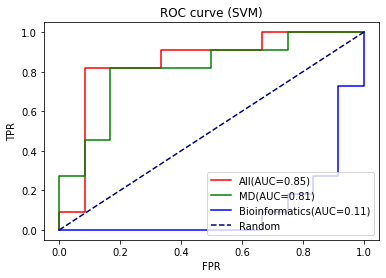

In [ ]:
plt.plot (fpr, tpr, color='red', label="All(AUC=%0.2f)"%auc)
plt.plot (md_fpr, md_tpr, color='green', label="MD(AUC=%0.2f)"%md_auc)
plt.plot (bio_fpr, bio_tpr, color='blue', label="Bioinformatics(AUC=%0.2f)"%bio_auc)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random')
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC curve (SVM)')

plt.savefig('svm_roc_all_models.pdf', bbox_inches='tight')

### Misc 
[under construction]

WARNING, IM NOT COMPUTING THE FPRs correctly


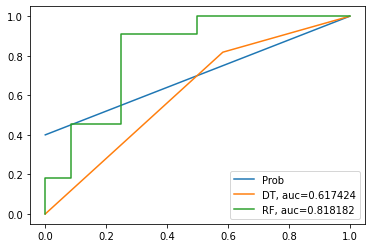

In [ ]:
case = cases["Prob"]
print("WARNING, IM NOT COMPUTING THE FPRs correctly")
case['fprs'] = case['fnrs']
plt.plot(case['fprs'],case['tprs'], label="Prob")

case = cases["DT"]
plt.plot(case['fprs'],case['tprs'], label="DT, auc=%f"%case['auc'])

case = cases["RF"]
plt.plot(case['fprs'],case['tprs'], label="RF, auc=%f"%case['auc'])

plt.legend()


*Displaying* features for all variants

Some complicated sorting

In [ ]:
df_alpha = df.sort_values(by='VARIANT') # alphabetically 

#df['position']
import re 

# finds all numbers in variant (position) 
nums = [re.findall(r'\d+',x) for x in df['VARIANT']]
#(lambda x: x[0] if len(x)>0 else 0)(nums)

# ugly, but returns the first number in each element, if defined, zero otherwise (for wt)
tables = [lambda x=x: int(x[0]) if len(x)>0 else 0 for x in nums]

df['Positions'] = [table() for table in tables]


df_seq = df.sort_values(by='Positions') # alphabetically 
df_seq.head()

,VARIANT,HELIX,TURNS,COILS,THREE-TEN,BETA,ISOLATED,RMSD,HBONDS,SASA,WATERS,FOLDX,CONSERVATION,HYDROPHOBICITY,CLASS,TRAFFICKING,INITAA,RMSF36TO41,RMSF87TO92,RMSF73TO78,RMSF115TO120,dWATERS,dHBONDS,dRMSD,dSASA,dHELIX,dTURNS,dCOILS,dTHREE-TEN,dBETA,dRMSF36TO41,dRMSF87TO92,dRMSF73TO78,dRMSF115TO120,dCONSERVATION,dFOLDX,dHYDROPHOBICITY,pInSoldWATERS,pInSoldHBONDS,pInSoldRMSD,pInSoldSASA,pInSoldHELIX,pInSoldTURNS,pInSoldCOILS,pInSoldTHREE-TEN,pInSoldBETA,pInSoldRMSF36TO41,pInSoldRMSF87TO92,pInSoldRMSF73TO78,pInSoldRMSF115TO120,pInSoldCONSERVATION,pInSoldFOLDX,pInSoldHYDROPHOBICITY,Prod,Positions
71,wt,19.48,21.96,14.71,3.29,40.50,0.056664,1.09,67.0,6569.0,1445.0,0.000000,0.000,0.00,0,1,20,1.12,1.35,0.83,1.51,-1.151265,-0.777555,-0.914757,0.872049,1.527552,0.507335,0.017821,0.515698,-1.054345,0.771854,0.748568,-0.256593,0.456716,-0.465748,-0.741874,0.186647,0.428925,0.472005,0.436109,0.653374,0.593050,0.825018,0.576213,0.482236,0.415692,0.602597,0.641170,0.450515,0.184685,0.458459,0.453964,0.489601,0,0
51,s26i,21.37,20.98,14.38,2.89,40.09,0.286529,1.03,67.0,6491.0,1440.0,-0.073278,-0.302,0.99,1,1,15,1.33,0.79,0.70,1.50,-1.370264,-0.602825,-1.316172,-0.193180,-0.659513,-0.811299,-0.419323,-0.446160,-0.575510,-0.070606,-0.344612,-0.598834,0.478631,-0.034764,-0.755779,1.346356,0.414232,0.517225,0.408170,0.418732,0.395676,0.409316,0.501136,0.345262,0.473794,0.387841,0.437912,0.398733,0.167568,0.493426,0.451199,0.336296,0,26
37,k28e,20.86,21.61,13.67,3.00,40.70,0.151515,1.14,68.0,6425.0,1459.0,1.511090,-0.549,0.48,1,1,8,1.20,0.77,0.83,1.54,-0.605389,-1.453719,-0.633748,-1.101305,-0.070039,0.043531,-1.372400,-0.169141,-1.280819,0.450917,-0.383654,-0.256593,0.390970,0.317730,-0.455142,0.748930,0.444711,0.408741,0.466396,0.392718,0.502319,0.580439,0.404338,0.346234,0.405561,0.509091,0.434461,0.450515,0.236036,0.509716,0.594071,0.460591,0,28
23,f29l,20.93,21.49,13.56,3.12,40.70,0.195019,1.17,65.0,6449.0,1465.0,1.191730,-0.808,-0.08,1,1,4,1.28,0.82,0.85,1.64,-0.338535,0.340737,-0.449235,-0.778300,-0.153259,-0.118631,-1.529039,0.111428,-1.284301,0.129979,-0.286049,-0.203940,0.171816,0.687348,-0.515741,0.092933,0.441746,0.682065,0.491184,0.408199,0.483244,0.512253,0.405405,0.367137,0.405405,0.398636,0.440397,0.485467,0.400164,0.528865,0.562259,0.467949,0,29
31,i30t,20.58,21.68,14.14,3.04,40.41,0.150015,1.17,66.0,6445.0,1453.0,1.848340,-0.109,-0.91,-1,1,7,1.20,0.83,0.80,1.73,-0.816683,-0.470104,-0.409770,-0.825032,0.252438,0.126571,-0.752399,-0.076810,-0.951613,0.450917,-0.266528,-0.335572,-0.025422,-0.310194,-0.391148,-0.879348,0.431037,0.548166,0.500416,0.404288,0.603041,0.639863,0.427389,0.353113,0.420287,0.509091,0.440618,0.398087,0.403665,0.477341,0.621401,0.396813,0,30


['WATERS', 'HBONDS', 'RMSD', 'SASA', 'HELIX', 'TURNS', 'COILS', 'THREE-TEN', 'BETA', 'RMSF36TO41', 'RMSF87TO92', 'RMSF73TO78', 'RMSF115TO120', 'CONSERVATION', 'FOLDX', 'HYDROPHOBICITY']
TRAFFIC: 
wt (0) s26i (1) k28e (2) f29l (3) i30t (4) a32t (5) n33t (6) v41m (7) i42n-q61g (8) i42n (9) g53r (10) y54h (11) r56q (12) a57p (13) e58k (14) e58d (15) e58a (16) q61g-c64w (17) c64i (18) c64y (19) c64w-c39g (20) c64m (21) c64l (22) c64a (23) t65p (24) f68l (25) h70n (26) h70r (27) p72l (28) p72q (29) a78p (30) a85v (31) i96t (32) y99s (33) r100g (34) f106y (35) f106l (36) v113g (37) v113e (38) p114s (39) v115m (40) m124t (41) m124r (42) f125c (43) e130k (44) 
NONTRAFFIC: 
i31s (0) v41w (1) v41f-c64g (2) v41f-q61g (3) v41f-c64a (4) v41f (5) v41a (6) v41i (7) v41y (8) y43c (9) g53d (10) s55l (11) e58g (12) c64w (13) c64f (14) c66g (15) g71r (16) t74r (17) t74p (18) t74m (19) l86p (20) l86r (21) l87p (22) v94g (23) f98s (24) r100w (25) r100q (26) k101e (27) c108r (28) v113p (29) 

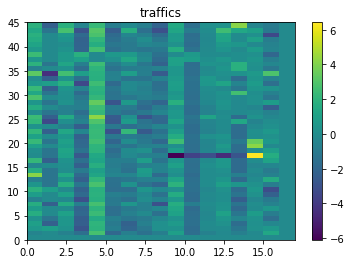

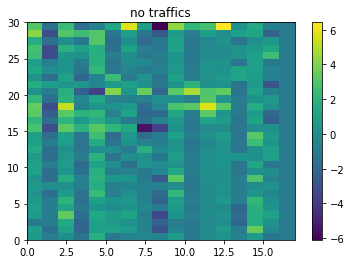

In [ ]:
def zscore(xs):
  zs = xs - np.mean(xs)
  zs /= np.std(xs)
  return zs

def CalcFeatureMatrix(ldf):
  nVar = len(ldf['VARIANT'])   
  featureMatrix = np.zeros([nVar,len(tags)+1]) # added tag for trafficking  

  for i,tag in enumerate(tags):
    v = zscore(ldf[tag])
    featureMatrix[:,i] = v
  featureMatrix[:,len(tags)] = ldf['TRAFFICKING']

  l = np.where(ldf["VARIANT"] == 'wt')[0]
  wtVal = featureMatrix[l,]
  featureMatrix = np.subtract(featureMatrix,wtVal)

  return featureMatrix

import matplotlib as mpl
def DisplayFeatureMatrix(ldf, featureMatrix):
  daMin = np.min(featureMatrix)
  daMax = np.max(featureMatrix)
  print(tags)
  fig, ax = plt.subplots()
  #fig.subplots_adjust(bottom=0.5)
  #cmap = mpl.cm.cool
  norm = mpl.colors.Normalize(vmin=daMin, vmax=daMax)

  print("TRAFFIC: ")
  l = np.where(ldf["TRAFFICKING"] == 1)
  traf = ldf[ldf['TRAFFICKING']==1]
  for i,j in enumerate(traf['VARIANT']):
    print(j+" (%d) "%i,end="")
  tr = featureMatrix[l,:]
  ax.pcolormesh(tr[0,:,:])
  fig.colorbar(mpl.cm.ScalarMappable(norm=norm))
  ax.set_title("traffics")

  print("\nNONTRAFFIC: ")
  fig, ax = plt.subplots()
  l = np.where(ldf["TRAFFICKING"] == 0)
  traf = ldf[ldf['TRAFFICKING']==0]
  for i,j in enumerate(traf['VARIANT']):
    print(j+" (%d) "%i,end="")
  tr = featureMatrix[l,:]
  ax.pcolormesh(tr[0,:,:])
  fig.colorbar(mpl.cm.ScalarMappable(norm=norm))
  ax.set_title("no traffics")

featureMatrix = CalcFeatureMatrix(df_seq)
DisplayFeatureMatrix(df_seq,featureMatrix)

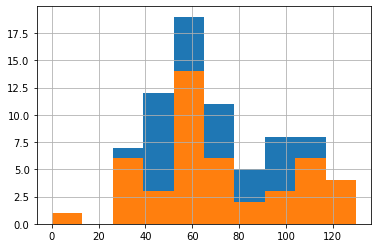

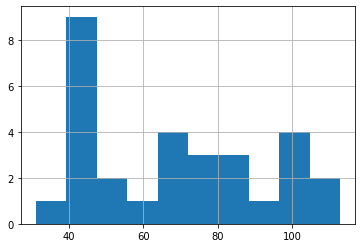

In [ ]:
df['Positions'].hist()

traf = df[df['TRAFFICKING']==1]
traf['Positions'].hist()

plt.figure()
nontraf = df[df['TRAFFICKING']==0]
nontraf['Positions'].hist()

In [ ]:
df_seq[df_seq['TRAFFICKING']==0]

,VARIANT,HELIX,TURNS,COILS,THREE-TEN,BETA,ISOLATED,RMSD,HBONDS,SASA,WATERS,FOLDX,CONSERVATION,HYDROPHOBICITY,CLASS,TRAFFICKING,INITAA,RMSF36TO41,RMSF87TO92,RMSF73TO78,RMSF115TO120,dWATERS,dHBONDS,dRMSD,dSASA,dHELIX,dTURNS,dCOILS,dTHREE-TEN,dBETA,dRMSF36TO41,dRMSF87TO92,dRMSF73TO78,dRMSF115TO120,dCONSERVATION,dFOLDX,dHYDROPHOBICITY,pInSoldWATERS,pInSoldHBONDS,pInSoldRMSD,pInSoldSASA,pInSoldHELIX,pInSoldTURNS,pInSoldCOILS,pInSoldTHREE-TEN,pInSoldBETA,pInSoldRMSF36TO41,pInSoldRMSF87TO92,pInSoldRMSF73TO78,pInSoldRMSF115TO120,pInSoldCONSERVATION,pInSoldFOLDX,pInSoldHYDROPHOBICITY,Prod,Positions
32,i31s,21.06,21.19,14.30,3.12,40.10,0.220522,1.09,66.0,6475.0,1458.0,3.942100,-0.340,-0.99,1,0,7,1.31,0.80,0.83,1.65,-0.634995,-0.482014,-0.922198,-0.413510,-0.300627,-0.523700,-0.531686,0.118530,-0.585957,0.009628,-0.325091,-0.256593,0.149901,0.019466,0.006148,-0.973062,0.442791,0.545389,0.435431,0.418911,0.449467,0.420756,0.476257,0.367667,0.473288,0.392159,0.439637,0.450515,0.400553,0.495487,0.763282,0.395838,0,31
68,v41w,20.28,22.69,15.25,3.05,37.87,0.853585,1.26,65.0,6419.0,1467.0,18.426200,-0.592,-0.17,1,0,17,1.01,0.81,0.77,1.82,-0.255802,0.679839,0.129374,-1.186386,0.597570,1.495839,0.742561,-0.051928,2.005206,1.213142,-0.305570,-0.414550,-0.222660,0.379095,2.754536,-0.012495,0.437568,0.715284,0.598398,0.397531,0.677394,1.000000,0.691057,0.354967,1.000000,0.620455,0.440175,0.391459,0.407166,0.513038,0.226220,0.443590,0,41
64,v41f-c64g,20.40,22.44,14.84,3.08,38.54,0.700570,1.33,66.0,6425.0,1419.0,8.550000,-1.400,0.19,-1,0,17,0.91,0.80,0.76,1.54,-2.199622,-0.429481,0.522982,-1.102954,0.465689,1.157606,0.194792,0.019096,1.228507,1.614313,-0.325091,-0.440876,0.390970,1.532192,0.880506,0.409217,0.391892,0.557636,0.758379,0.392812,0.658794,0.951462,0.596075,0.360258,0.910330,0.429545,0.439637,0.392498,0.236036,0.666667,0.716600,0.470909,0,41
65,v41f-q61g,20.65,22.54,15.63,2.97,37.62,0.586559,1.64,66.0,6460.0,1460.0,9.060000,-1.188,0.92,1,0,17,1.22,0.96,0.80,1.60,-0.542528,-0.001546,2.460035,-0.624769,0.172686,1.293304,1.244180,-0.240166,2.290765,0.370682,-0.012754,-0.335572,0.259478,1.229646,0.977280,1.264356,0.448789,0.617306,1.000000,0.415069,0.576047,0.992976,0.557852,0.340943,1.000000,0.479481,0.443500,0.398087,0.338739,0.659923,0.691696,0.379630,0,41
63,v41f-c64a,19.81,21.94,14.95,3.18,39.66,0.459046,1.30,66.0,6491.0,1467.0,9.660000,-1.400,0.28,1,0,17,1.29,0.80,0.77,1.44,-0.259452,0.142024,0.377506,-0.198265,1.141967,0.476955,0.341265,0.260602,-0.070557,0.089862,-0.325091,-0.414550,0.610123,1.532192,1.091131,0.514645,0.438316,0.655020,0.695940,0.418500,0.664452,0.818729,0.612515,0.390665,0.517290,0.396477,0.439637,0.391459,0.064865,0.666667,0.660771,0.454685,0,41
62,v41f,20.35,22.24,15.13,3.05,38.68,0.546483,1.42,66.0,6467.0,1461.0,11.558300,-0.592,0.07,1,0,17,1.33,0.86,0.79,1.78,-0.508056,0.106376,1.088111,-0.532679,0.518742,0.886210,0.583648,-0.052449,1.065645,-0.070606,-0.207965,-0.361898,-0.134999,0.379095,1.451338,0.268646,0.447845,0.650040,0.828878,0.418666,0.666276,0.886472,0.657704,0.354928,0.812441,0.387841,0.441283,0.389381,0.405610,0.513038,0.580662,0.493939,0,41
61,v41a,21.49,21.35,14.76,2.99,39.06,0.352535,1.22,65.0,6472.0,1453.0,2.424690,-0.592,-0.29,1,0,17,1.65,0.88,0.83,1.57,-0.852372,0.379240,-0.155050,-0.452821,-0.794746,-0.313064,0.080423,-0.208205,0.615598,-1.354354,-0.168922,-0.256593,0.325224,0.379095,-0.281784,-0.153066,0.431270,0.686061,0.559511,0.419414,0.384765,0.446162,0.583239,0.343324,0.745504,0.363288,0.441726,0.450515,0.287387,0.513038,0.662759,0.414284,0,41
66,v41i,20.93,21.44,14.43,3.01,40.05,0.123012,1.12,67.0,6512.0,1458.0,-0.858324,-0.592,0.19,1,0,17,1.13,0.77,0.79,1.68,-0.612284,-0.556246,-0.716398,0.089140,-0.153259,-0.185468,-0.353110,-0.147834,-0.531980,0.731736,-0.383654,-0.361898,0.084155,0.379095,-0.904743,0.409217,0.444264,0.528083,0.455865,0.423536,0.483244,0.489534,0.514758,0.347822,0.475901,0.594372,0.434461,0.389381,0.401720,0.513038,0.421573,0.470909,0,41
69,v41y,21.11,22.33,15.08,2.84,

In [ ]:
temp = df_seq[df_seq['Positions']==74]
temp[['VARIANT','TRAFFICKING']]

,VARIANT,TRAFFICKING
56,t74r,0
55,t74p,0
54,t74m,0


Plotting of correlation plots

In [ ]:

#cp /content/herg/*.txt /content/drive/MyDrive/herg-local/

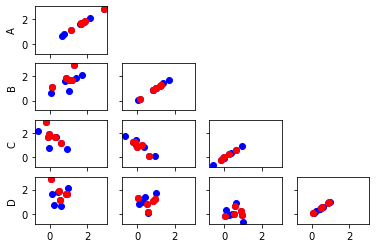

In [ ]:
import numpy as np
xs = np.linspace(0,1,10)
df = pd.DataFrame()
trafix = np.zeros_like(xs)
trafix[::2]=1
df['CLASS'] = trafix
df['A'] = xs*2 + np.random.rand(len(xs))
df['B'] = xs*1 + np.random.rand(len(xs))
df['C'] = -xs + np.random.rand(len(xs))
df['D'] =  np.random.rand(len(xs))

ndf = df[ df['CLASS']==0]

features = ["A", "B", "C", "D"]
idx = len(features)
#df['']
fig, axs = plt.subplots(idx, idx, sharex=True, sharey=True)

for i, featurei in enumerate(features):
  for j, featurej in enumerate(features):
    if i < j:
       axs[i, j].axis('off')

    #print(featurei, featurej)
    else:
      axs[i, j].scatter(
          df[featurei],df[featurej],
          color='b'
          )
      axs[i, j].scatter(
          ndf[featurei],ndf[featurej],
          color='r'
          )
    if j==0: 
       axs[i, j].set_ylabel(featurei)

Quasi-bootstrapping example
Repeat the following 'n' times:
- Divide set into training/testing (not done in general, but suitable for this)
- Compute statistic of interest  (s)
- Store statistic

Then: 
- compute smean from avg( s1...sn ) 
- rank order {s1..sn}
- use 5th percentile as s5th, 95th percentile as s95th
- report s5th, smean, s95

  

In [ ]:
import numpy as np

pts = np.random.randn(1000) # mean zero numbers
iters = 10000
means = np.zeros(iters)

for i in range(iters):
  itersTraining = int(0.7 * iters)
  ptsi = np.random.choice(pts,itersTraining) # random w replacement
  # use my probability-based classifier to get ROC curve
  ptsi # do stuff
  # train with ptsi 
  itersTest = int(0.3 * iters)
  ptsj = np.random.choice(pts,itersTest) # random w replacement
  ptsj # do stuff

  # you'll want to store a matrix of ROC curves (length iters)  
  means[i] = np.mean( ptsi )


Bootstrapped

In [ ]:
sorted = np.sort(means)
da5th = int(iters * 0.05)
da95th = int(iters * 0.95)

print("Mean %f"% np.mean(sorted))
print("Conf interval [%f,%f]"%( sorted[da5th],  sorted[da95th]))


Mean -0.017948
Conf interval [-0.037104,0.001496]


Standard (using original sample)

In [ ]:
print("Mean %f"% np.mean(pts))
print("Conf interval [%f,%f]" %(np.mean(pts) - np.std(pts)/np.sqrt(iters), np.mean(pts) + np.std(pts)/np.sqrt(iters)))


Mean -0.018028
Conf interval [-0.027839,-0.008216]


In [ ]:
da95th

9500

In [ ]:
len(df)

10